<font size = +2 color = "Red"><b>Project Title : Extraction/identification of major topics & themes discussed in news articles</b><font/>

<font size = +2 color ="Blue"><b>Problem Description</b><font/>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

<font size = +2 color ="Blue"><b>Data Description</b><font/>
    
<font size = +1 color ="Blue"><b>Attribute information</b><font/>

#### *InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
#### *StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
#### *Description: Product (item) name. Nominal.
#### *Quantity: The quantities of each product (item) per transaction. Numeric.
#### *InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
#### *UnitPrice: Unit price. Numeric, Product price per unit in sterling.
#### *CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
#### *Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing the libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
from datetime import datetime
import os
import sys
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

* Till here I have imported the libraries which are assential for my project and desribed the problem statement.
* Let's import the dataset from the local system and continue the eploration of data and modeling for later.

In [2]:
%cd # checking present working diorrectory

[WinError 2] The system cannot find the file specified: '# checking present working diorrectory'
C:\Users\Sunny.Kumar


* Let's change the working dirrectory to where I have my dataset placed.

In [3]:
os.chdir('C:\\Users\\Sunny.Kumar\\Desktop\\Customer_segmentation')#changing the dirrectory

In [4]:
df = pd.read_excel("Online Retail.xlsx") # Reading the dataset with file format of excel file with xlsx. extension

* Let's see now if my import was successful!!

In [5]:
df # Yes import was successful!

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

* Let's start with <font size = +4 color ="Blue"><b>Exploratory Data Analysis</b><font/>

In [6]:
df.head() # checking top rows of dataset

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [7]:
df.tail()# checking the bottom rows of data

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [8]:
df.shape # checking how many columns and rows available

(541909, 8)

In [9]:
df.info() # checking the info of the data including not null null object type column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
df.dtypes # cheking the datatype of the columns or variables

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [11]:
df.describe() # looking for discreptive statistics of data

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

**Findings**
* Mean is far from the median shows that we dont have normal distribution of data.
* Since we have other columns in object datatype hence we don't have statistical description for those other columns.
* In quantity we have values in negative and as well as in UnitPrice.


* Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode

* Negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean<median<mode

* For normal distribution graph mean=median=mode.


In [12]:
df.columns # checking the columns in the data

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
df.nunique().sort_values(ascending =True) # checking the unique values in the data columns

Country           38
Quantity         722
UnitPrice       1630
StockCode       4070
Description     4223
CustomerID      4372
InvoiceDate    23260
InvoiceNo      25900
dtype: int64

### Missing value exploration

In [14]:
df.isnull() # cheking the null values in the form of True and false false

InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0           False      False        False     False        False      False   
1           False      False        False     False        False      False   
2           False      False        False     False        False      False   
3           False      False        False     False        False      False   
4           False      False        False     False        False      False   
...           ...        ...          ...       ...          ...        ...   
541904      False      False        False     False        False      False   
541905      False      False        False     False        False      False   
541906      False      False        False     False        False      False   
541907      False      False        False     False        False      False   
541908      False      False        False     False        False      False   

        CustomerID  Country  
0            False    False  
1            False    False  
2            False    False  
3            False    False  
4            False    False  
...            ...      ...  
541904       False    False  
541905       False    False  
541906       False    False  
541907       False    False  
541908       False    False  

[541909 rows x 8 columns]

In [15]:
df.isna().sum() # cheking na's using sum() getting sum od na's in the columns

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
df.isna().sum()*100/len(df) # chekingna values using percentages

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

### Exploring Unique values

In [17]:
df['Country'].nunique() # Looking for unique countries

38

* Let's see what are those.

In [18]:
df.Country.unique() # cheking names of unique countries

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [19]:
customer_country=df[['Country','CustomerID']].drop_duplicates() # Let's aggreate and see customer ID how many from Country wise.
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

Country  CustomerID
36        United Kingdom        3950
14               Germany          95
13                France          87
31                 Spain          31
3                Belgium          25
33           Switzerland          21
27              Portugal          19
19                 Italy          15
12               Finland          12
1                Austria          11
25                Norway          10
24           Netherlands           9
0              Australia           9
6        Channel Islands           9
9                Denmark           9
7                 Cyprus           8
32                Sweden           8
20                 Japan           8
26                Poland           6
34                   USA           4
5                 Canada           4
37           Unspecified           4
18                Israel           4
15                Greece           4
10                  EIRE           3
23                 Malta           2
35  United Arab Emirates           2
2                Bahrain           2
22             Lithuania           1
8         Czech Republic           1
21               Lebanon           1
28                   RSA           1
29          Saudi Arabia           1
30             Singapore           1
17               Iceland           1
4                 Brazil           1
11    European Community           1
16             Hong Kong           0

### Let's Explore further Country column

In [20]:
country_df=df['Country'].value_counts().reset_index() # counting the values for country columns and setting the name as Country_name and counting the values present
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

Country_Name   Count
0  United Kingdom  495478
1         Germany    9495
2          France    8557
3            EIRE    8196
4           Spain    2533

In [21]:
country_df.tail() #country with minimum count.

Country_Name  Count
33       Lithuania     35
34          Brazil     32
35  Czech Republic     30
36         Bahrain     19
37    Saudi Arabia     10

In [22]:
country_df.head() # country with maximum count.

Country_Name   Count
0  United Kingdom  495478
1         Germany    9495
2          France    8557
3            EIRE    8196
4           Spain    2533

<AxesSubplot:title={'center':'Top 5 Country based on the Most Numbers Customers'}, xlabel='Country_Name', ylabel='Count'>

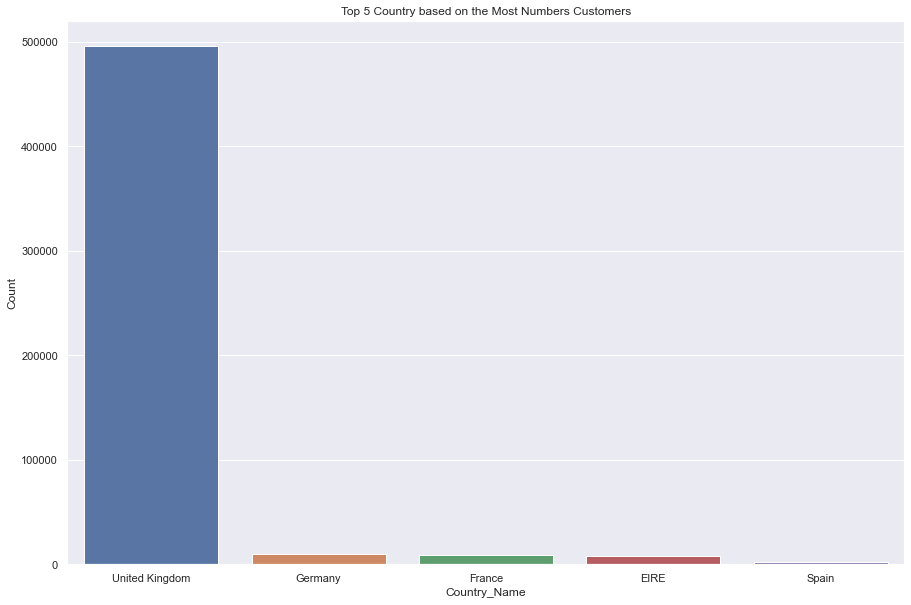

In [23]:
plt.figure(figsize=(15,10))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

### Visualization for country

**Findings**
* above are top 5 country with most numbers of the customers.
* From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain.**

<AxesSubplot:title={'center':'Top 5 Country based least Numbers of  Customers'}, xlabel='Country_Name', ylabel='Count'>

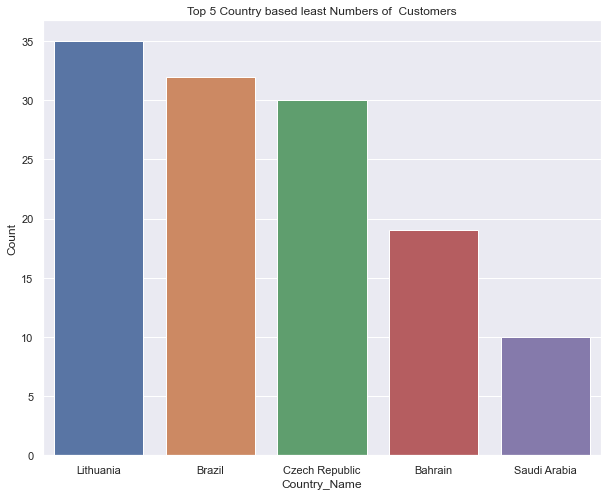

In [24]:
plt.figure(figsize=(10,8)) # plotting for the bottom or country with the least number of customers.
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

## Findings__
* From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia

## Findings__
* Did groupby Country and aggregated by Customer ID to see the how many unique Customers we have from 28 countries.
 
**Least Country ID's**
*    Israel	4
*	Greece	4
*	EIRE	3
*	Malta	2
*	United Arab Emirates	2
*	Bahrain	2
*	Lithuania	1
*	Czech Republic	1
*	Lebanon	1
*	RSA	1
*	Saudi Arabia	1
*	Singapore	1
*	Iceland	1
*	Brazil	1
*	European Community	1
*	Hong Kong	0


**Maximum uniques ID's**

United Kingdom	3950
* 	Germany	95
* 	France	87
*	Spain	31
*	Belgium	25
*	Switzerland	21


**More than 80% of the customers in the data are from the United Kingdom. There’s some research indicating that customer clusters vary by geography.**



In [25]:
df[df['Country']=='Saudi Arabia'] # checking for country Saudi Arabia since its the country with least count of number of customers

InvoiceNo StockCode                        Description  Quantity  \
100810    544838     22915      ASSORTED BOTTLE TOP  MAGNETS         12   
100811    544838     22363               GLASS JAR MARMALADE          6   
100812    544838     22362       GLASS JAR PEACOCK BATH SALTS         6   
100813    544838     22361  GLASS JAR DAISY FRESH COTTON WOOL         6   
100814    544838     22553             PLASTERS IN TIN SKULLS        12   
100815    544838     22555          PLASTERS IN TIN STRONGMAN        12   
100816    544838     22556     PLASTERS IN TIN CIRCUS PARADE         12   
100817    544838     20781           GOLD EAR MUFF HEADPHONES         2   
100818    544838     22969       HOMEMADE JAM SCENTED CANDLES        12   
108127   C545507     22361  GLASS JAR DAISY FRESH COTTON WOOL        -5   

               InvoiceDate  UnitPrice  CustomerID       Country  
100810 2011-02-24 10:34:00       0.42     12565.0  Saudi Arabia  
100811 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia  
100812 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia  
100813 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia  
100814 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia  
100815 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia  
100816 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia  
100817 2011-02-24 10:34:00       5.49     12565.0  Saudi Arabia  
100818 2011-02-24 10:34:00       1.45     12565.0  Saudi Arabia  
108127 2011-03-03 11:43:00       2.95     12565.0  Saudi Arabia

## Findings__

**Till Here I have explored that I have 541909 observations and 8 columns.**
* I have columns with object types int, float, object and datetime64[ns].

*I have explored the null values using different different approaches to ensure the clarity of information*

**I have explored that I am having amount of null value in 2 columns:**
* Description     0.268311 (0.26%).
* CustomerID     24.926694(24%).
      
**Columns with highest unique values are** 
* InvoiceDate    23260*
* InvoiceNo      25900*

**Columns with lowest Unique values are**
* Country           38
* Quantity         722
* UnitPrice       1630

**Country column with unique countries are:**
* 38



## Let's Start Now after observing Missing value-Handling

In [26]:
df['Description'].dtype # let's see what is datatype of null value containing columns

dtype('O')

In [27]:
df['Description'].mode()# since its catagorical column so imputing with mode

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

In [164]:
df['Description'].dropna(inplace =True) # dropping na

In [165]:
df['Description'].isnull().sum() # let's check if we have na's avalilable still

0

In [166]:
df.isnull().sum() # cheking again null values present

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Day            0
year           0
month_num      0
day_num        0
hour           0
minute         0
TotalAmount    0
Month          0
Time_type      0
dtype: int64

In [31]:
df.dropna(inplace=True) # dropping the na's from the dataset

In [32]:
df.isnull().sum()*100/len(df) # let's see  if am cleaned the data with null values or not!!!

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [80]:
import missingno as msno # importing missingno for to check the missing values and see their relatioship using missingno

<AxesSubplot:>

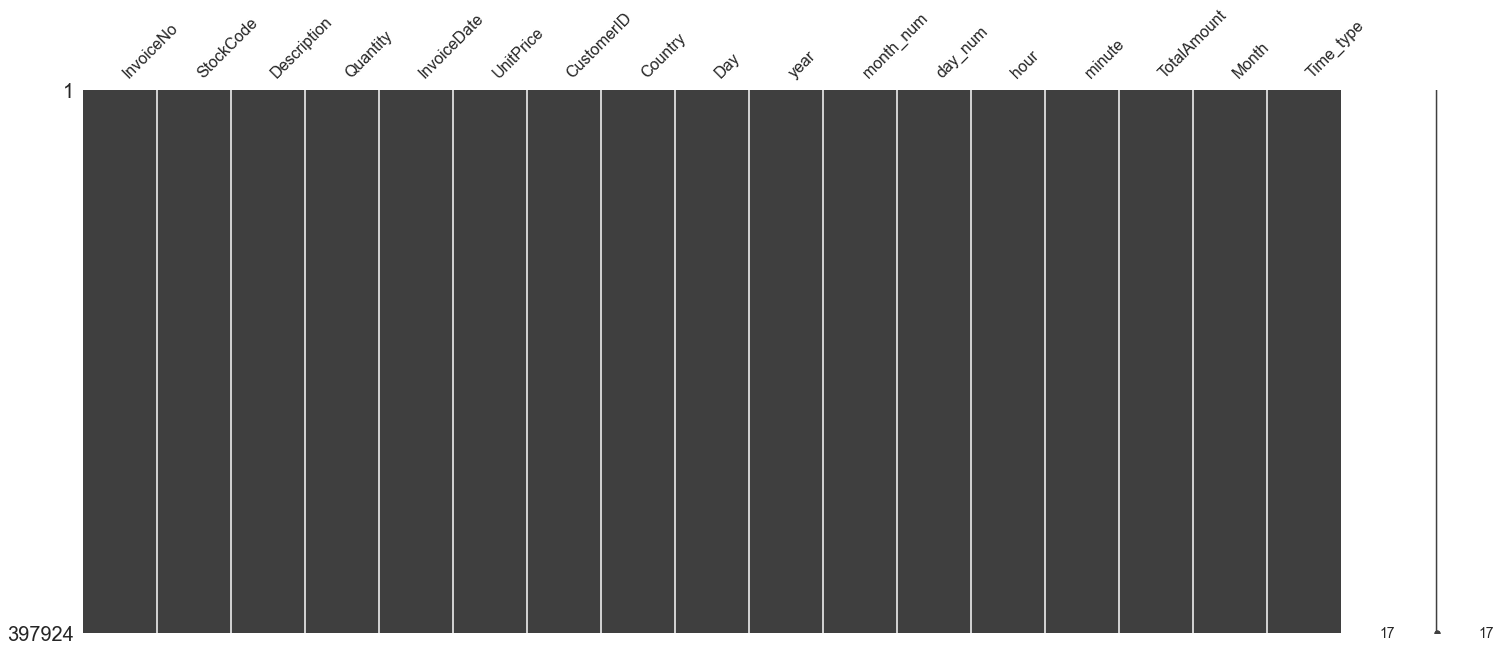

In [81]:
msno.matrix(df)

In [33]:
df.shape

(406829, 8)

## Findings__
* **missing values in the CustomerID column are 24% or 135080 , and since our analysis is based on customers, we will remove these missing values and also imputing description with mode make no sense.**
* **After removal of na's we have now (406829, 8) observation and variables.**
* **From this it is clear that we dont have now missing values in out data**

* **In above matrix it will turn as white if missings are available in the dataset, amount of missings means that much time white space will get enerated inside the column, since all looks like gray means we dont have missing values present.**

### Checking unique value for each column.

In [34]:
def unique_counts(df): # defining a function that shows the unique value in columns in term of percentages
   for i in df.columns:
       count = df[i].nunique()*100/len(df)
       print(i, ": ", count)
unique_counts(df)

InvoiceNo :  5.454380095814212
StockCode :  0.90554016552409
Description :  0.9576505116400257
Quantity :  0.10717033446484887
InvoiceDate :  5.029140007226624
UnitPrice :  0.1523981820371704
CustomerID :  1.0746529868814663
Country :  0.009094730218347266


**Findings**

*We have following percentages of unique values in the columns*
* InvoiceNo :  5.454380095814212
* StockCode :  0.90554016552409
* Description :  0.9576505116400257
* Quantity :  0.10717033446484887
* InvoiceDate :  5.029140007226624
* UnitPrice :  0.1523981820371704
* CustomerID :  1.0746529868814663
* Country :  0.009094730218347266

In [35]:
df['InvoiceDate'].min() # finding out initial order date

Timestamp('2010-12-01 08:26:00')

In [36]:
df['InvoiceDate'].max() # finding out last order date

Timestamp('2011-12-09 12:50:00')

**Findings**
* Since recency is calculated for a point in time, and the last invoice date is 2011–12–09, we will use 2011–12–10 to calculate recency.

In [37]:
import datetime as dt # based on time using last dae as 2011,12,10__since its after 12:00
NOW = dt.datetime(2011,12,10)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

### Explore Quantity Column

In [38]:
df.Quantity.min() # what is minimum value in the Quantity column

-80995

In [39]:
df = df[(df['Quantity']>0)] # removing the negative values present in the Quantity column

In [40]:
df.describe() # cheking the quantity negative values if got removed

Quantity      UnitPrice     CustomerID
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174   15294.315171
std       180.420210      22.096788    1713.169877
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

## Findings__
* We had negative values in Quantity columns which were removed.
* I also provided next date based on timing for Invoice date.
 

### Now Let's focus on converting the Datatypes

In [41]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str') # telling to convert into str

In [42]:
df=df[~df['InvoiceNo'].str.contains('C')] #we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation

* Dropping the Invoice No starts with 'c', it stands for a cancel.

In [43]:
df.shape # checking the data after dropping these above is's

(397924, 8)

In [44]:
df.columns # let's see columns once again

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Explore further more on Discription column.

In [45]:
Description_df=df['Description'].value_counts().reset_index() # converting the discription name and counting the values on current spot.
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2028
1            REGENCY CAKESTAND 3 TIER   1724
2             JUMBO BAG RED RETROSPOT   1618
3       ASSORTED COLOUR BIRD ORNAMENT   1408
4                       PARTY BUNTING   1397

In [46]:
Description_df.min() # checking lowest values present

Description_Name     4 PURPLE FLOCK DINNER CANDLES
Count                                            1
dtype: object

In [47]:
Description_df.max()# cheking highest values present

Description_Name    ZINC WIRE SWEETHEART LETTER TRAY
Count                                           2028
dtype: object

### Visualization for Description_name

<AxesSubplot:title={'center':'Top 5 Product Name'}, xlabel='Description_Name', ylabel='Count'>

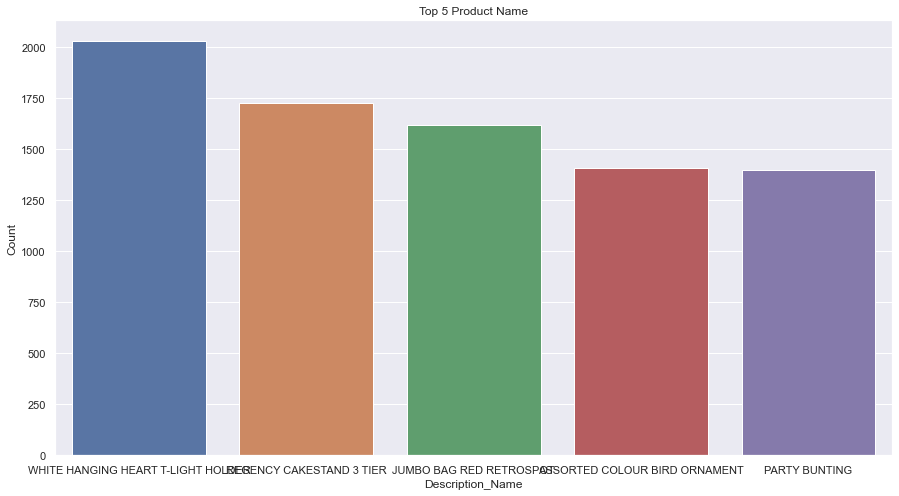

In [48]:
plt.figure(figsize=(15,8)) # let's do some visualization for the Discription column for top 5 products
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

## Findings__
**for Discription column**
* I started with renaming the descrption column.
* counted the values present in the column.
* checked lowest values =1
* checked highest values = 2028

**Top product  based on maximum selling  are :**
*    1.WHITE HANGING HEART T-LIGHT HOLDER,
*    2.REGENCY CAKESTAND 3 TIER
*    3.JUMBO BAG RED RETROSPOT
*    4.PARTY BUNTING
*    5.LUNCH BAG RED RETROSPOT

<AxesSubplot:title={'center':'Bottom 5 product Name'}, xlabel='Description_Name', ylabel='Count'>

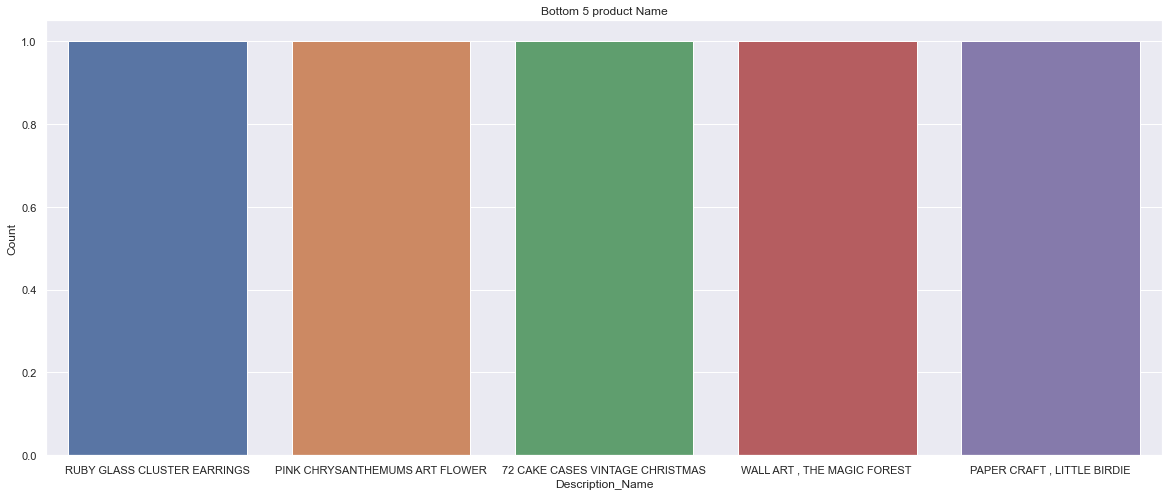

In [49]:
plt.figure(figsize=(20,8))# let's do some visualization for the Discription column for buttom 5 products
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

**Bottom 5 Product based on the selling are:**
    
*   1.light deorated battry operated	
*    2.Water damaged.
*   3.throw away.	
*   4.re dotcom quick fix.	
*   5.Birthday Banner Tape.

### Turn to explore the stockCode

In [50]:
StockCode_df=df['StockCode'].value_counts().reset_index() # finding total values and changing the column name and counting the values
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

StockCode_Name  Count
0         85123A   2035
1          22423   1724
2         85099B   1618
3          84879   1408
4          47566   1397

In [51]:
StockCode_df.min() # checking count of minimum values

Count    1
dtype: int64

In [52]:
StockCode_df.max()# checking count of maximum values

Count    2035
dtype: int64

### Visualization for StockCode

<AxesSubplot:title={'center':'Top 5 Stock Name'}, xlabel='StockCode_Name', ylabel='Count'>

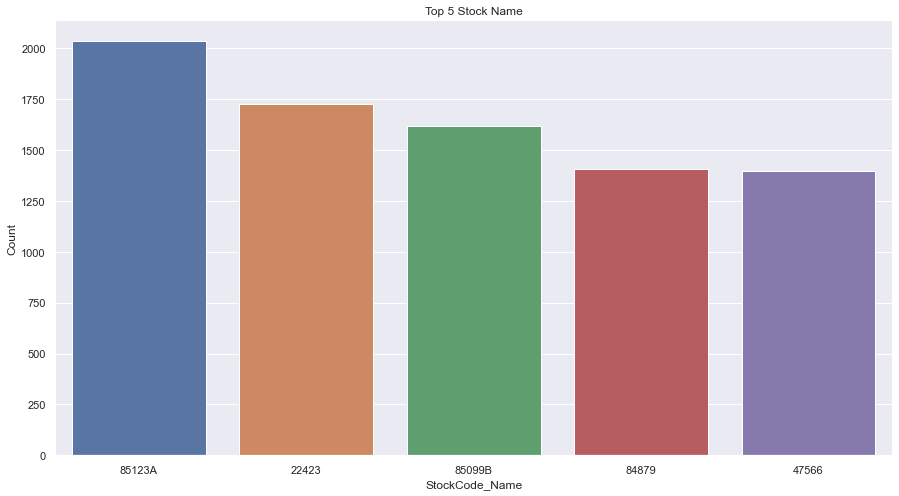

In [53]:
plt.figure(figsize=(15,8)) # for top stockCode visualization
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

**Top 5 Stock name based on selling are**
* 85123A
* 22423
* 85099B	
* 47566
* 20725

<AxesSubplot:title={'center':'Bottom 5 Stock Name'}, xlabel='StockCode_Name', ylabel='Count'>

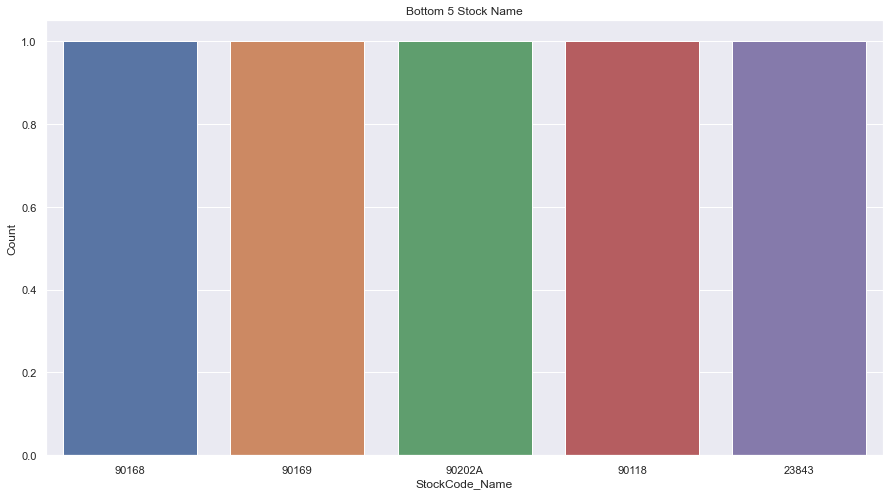

In [54]:
plt.figure(figsize=(15,8))# checking the buttom 5 stock name
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])

## Findings__
* **Earlier in the analysis we have found that we have  Quantity which was not following the normal distribution of the data.**

* **So now we will check the ditribtion of data in Quantity using suitable plot.**

<AxesSubplot:title={'center':'distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

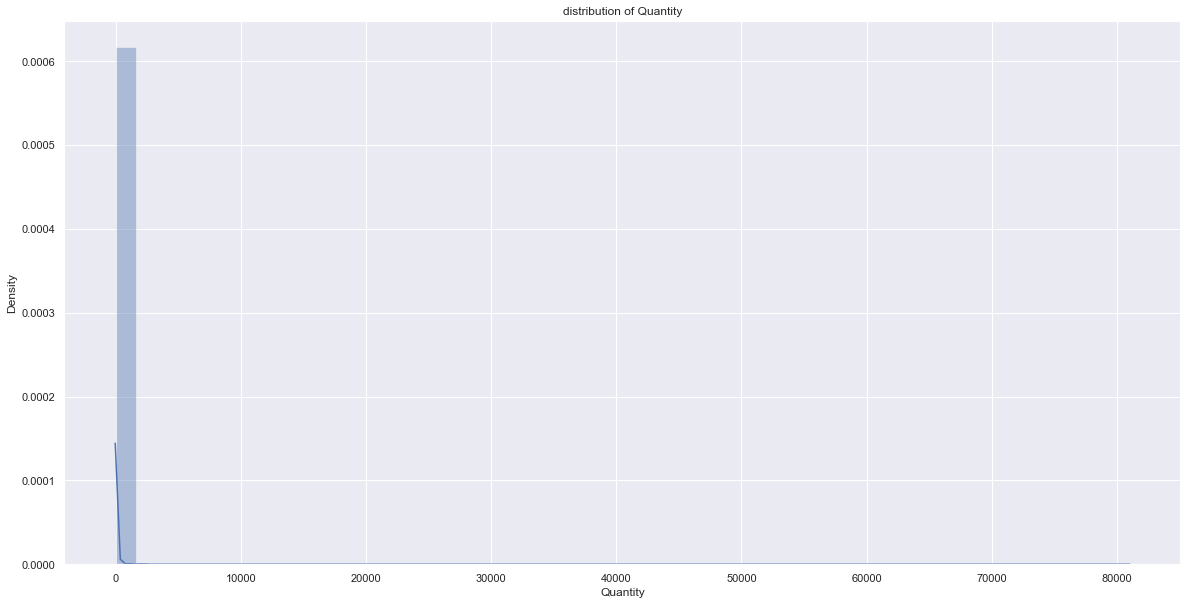

In [55]:
#distribution of Quantity
plt.figure(figsize=(20,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'])

#### Seems like we have Quantity negatively skewed or right skewed.

<AxesSubplot:title={'center':'log distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

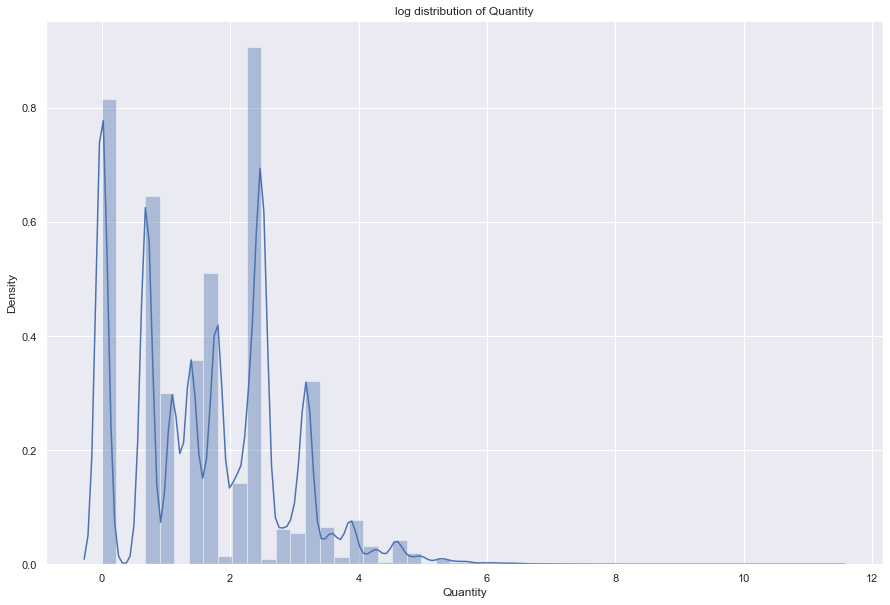

In [56]:
plt.figure(figsize=(15,10)) # visualization of Quantity column USING LOG.
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))

**The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.
Natural logarithm log is the inverse of the exp(), so that log(exp(x)) = x. The natural logarithm is log in base e.**

<AxesSubplot:title={'center':'distribution of UnitPrice'}, xlabel='UnitPrice', ylabel='Density'>

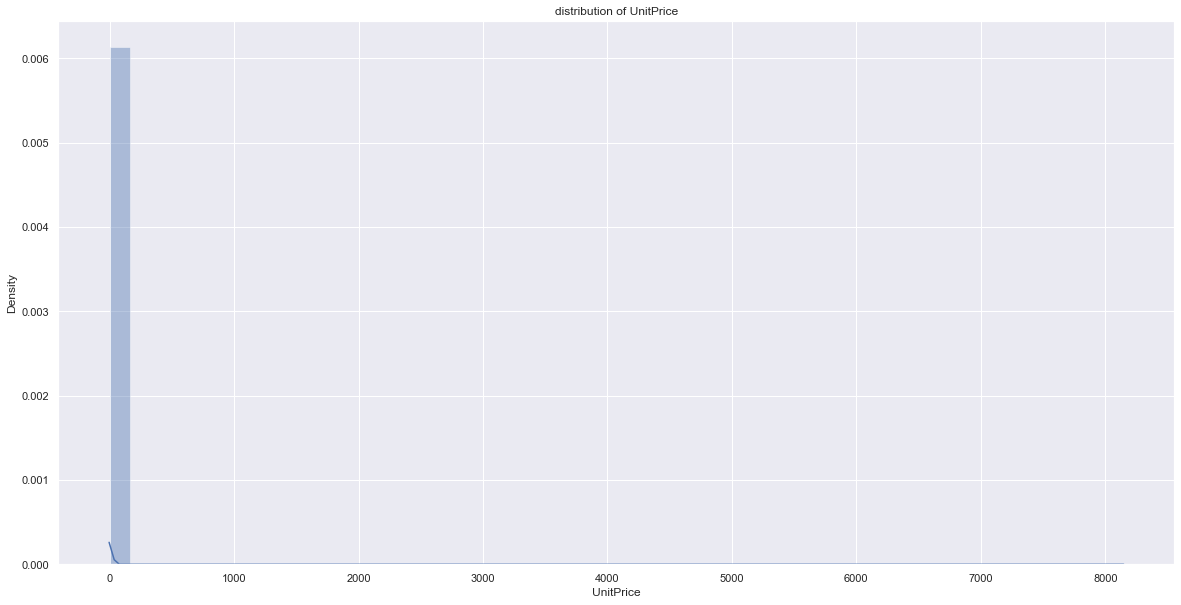

In [57]:
### Let's see distribution of UnitPrice
plt.figure(figsize=(20,10))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'])

* **Looks like UnitPrice is also negatively skewed.**

In [83]:
df[df['UnitPrice']<0]# looking for NEGATIVE VALUES

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Day, year, month_num, day_num, hour, minute, TotalAmount, Month, Time_type]
Index: []

In [59]:
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

# Let's Perform  FEATURE ENGINEERING

#### Convert InvoiceDate columns into date time formate.

In [60]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

#### Create a new features Day from Invoicedate.

In [61]:
df['Day']=df['InvoiceDate'].dt.day_name() # creating column day column from InvoiceDate

In [62]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year) # creating columns of year, Month_num,day_num,hours and minutes from InvoiceDate
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month) # apply the lambda function for column creation from InvoiceDate
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [63]:
df.head() # let's see if we have the created columns with us or not

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday  2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   

   month_num  day_num  hour  minute  
0         12        1     8      26  
1         12        1     8      26  
2         12        1     8      26  
3         12        1     8      26  
4         12        1     8      26

In [64]:
df['TotalAmount']=df['Quantity']*df['UnitPrice'] # creating new column as Total amount putting Quantity and Unitprice in it

In [65]:
df['Month']=df['InvoiceDate'].dt.month_name() # creating month from InvoiceDate for its name reference

In [66]:
df.head()# checking if  feature engineering has applied to original dataset or not.

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday  2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   

   month_num  day_num  hour  minute  TotalAmount     Month  
0         12        1     8      26        15.30  December  
1         12        1     8      26        20.34  December  
2         12        1     8      26        22.00  December  
3         12        1     8      26        20.34  December  
4         12        1     8      26        20.34  December

### Let's perform visualization now

<AxesSubplot:title={'center':'distribution of Amount'}, xlabel='TotalAmount', ylabel='Density'>

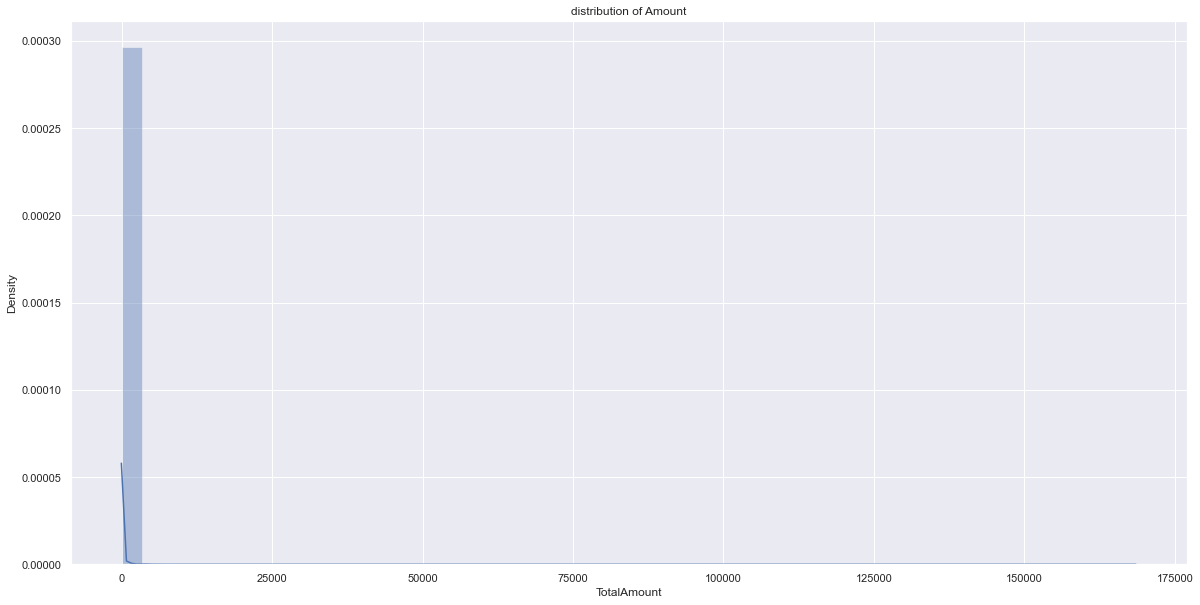

In [67]:
plt.figure(figsize=(20,10))# plotting for the Total amount to see the distribution.
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'])

* **Looks like data is positively skewed**

In [68]:
df['TotalAmount'].describe() # discriptive statistics for the TotalAmount

count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

<AxesSubplot:>

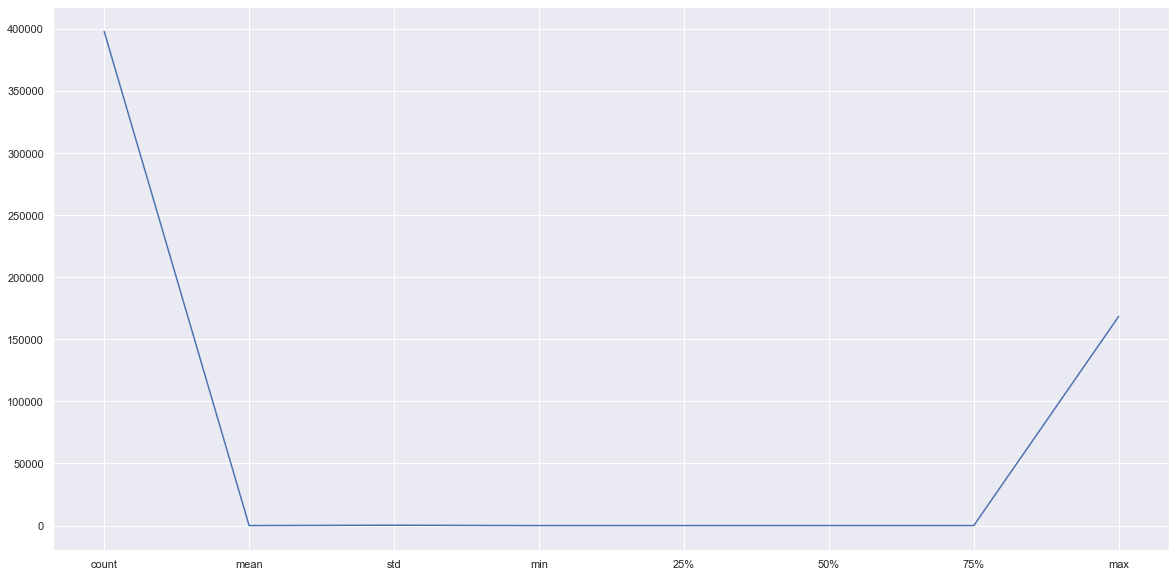

In [69]:
plt.figure(figsize=(20,10)) # plotting for the Total amount
df['TotalAmount'].describe().plot()

**This plot is useful for to show the data distribution as for its:** 
* count    , mean        , std     ,  min       ,    25%       ,   50%      ,    75%     ,   max

In [70]:
day_df=df['Day'].value_counts().reset_index() # visualization for its Day values
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Day_Name  Count
0   Thursday  80052
1  Wednesday  68888
2    Tuesday  66476
3     Monday  64899
4     Sunday  62775
5     Friday  54834

#### Let's perform plotting for this

<AxesSubplot:title={'center':'Day'}, xlabel='Day_Name', ylabel='Count'>

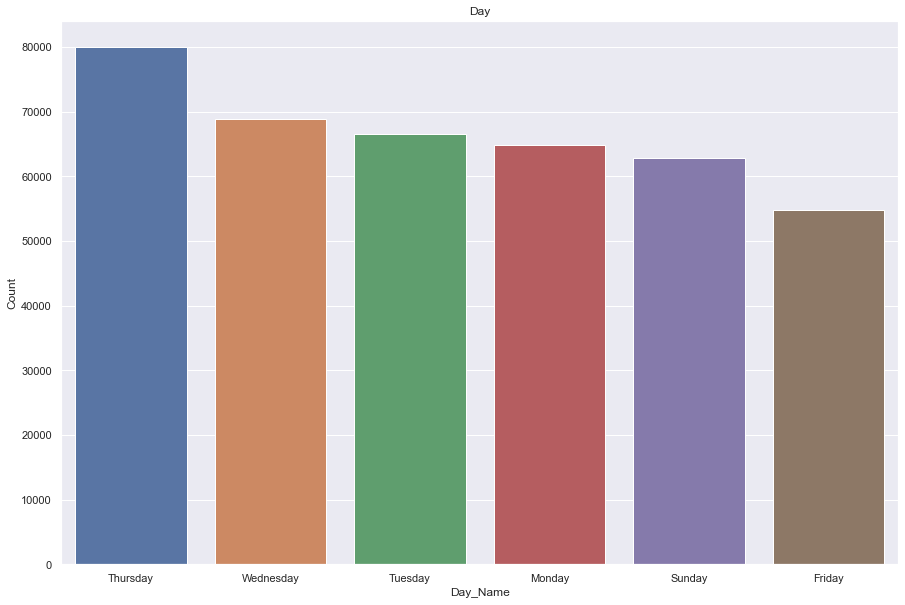

In [71]:
plt.figure(figsize=(15,10))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

### Most of the customers have purchesed the items in Thursday ,Wednesday and Tuesday.

In [72]:
month_df=df['Month'].value_counts().reset_index() # counts for Month
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

Month_Name  Count
0    November  64545
1     October  49557
2    December  43464
3   September  40030
4         May  28322
5        June  27185
6       March  27177
7      August  27013
8        July  26827
9       April  22644
10    January  21232
11   February  19928

**For November we have maximum number of customers 64545, and we have least count month wise for month February  = 19928**

### Plotting for Month

<AxesSubplot:title={'center':'Month'}, xlabel='Month_Name', ylabel='Count'>

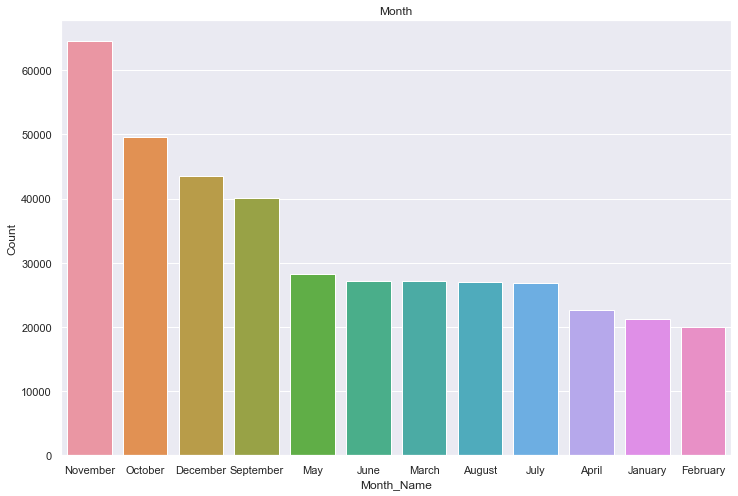

In [73]:
plt.figure(figsize=(12,8)) # visualization for above count of Monthly wise.
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

## Findings__
* **Most numbers of customers have purchased in the months of November ,October, December and September.**
* **Months of April ,January and February, we have less number of customer buying.**

### Let's see Hour column

In [74]:
hour_df=df['hour'].value_counts().reset_index() # counting customer hour wise purchase
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  72069
1          13  64031
2          14  54127
3          11  49092
4          15  45372
5          10  37999
6          16  24093
7           9  21945
8          17  13072
9           8   8691
10         19   3322
11         18   2929
12         20    802
13          7    379
14          6      1

## Findings__

**we have hour numbers_topping**
* 12	___72069
* 	13	___64031
*	14	__54127 

**we have hour numbers_least**

* 20___	802
* 7___	379
*	6____	1

<AxesSubplot:title={'center':'Hour'}, xlabel='Hour_Name', ylabel='Count'>

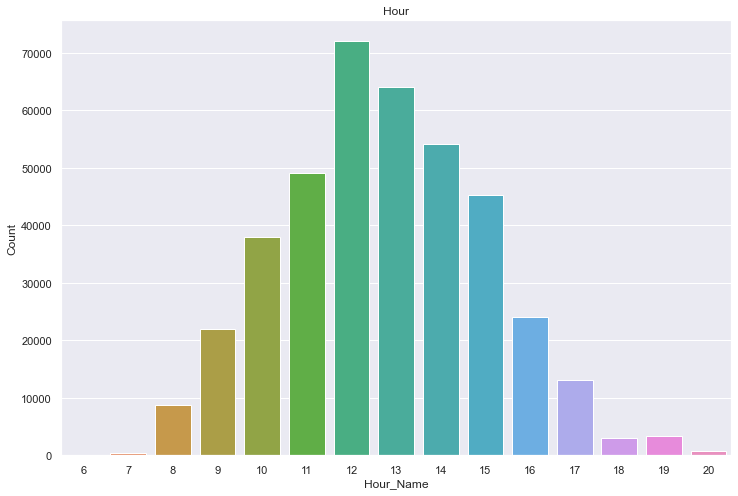

In [75]:
### Let's plot the Hour
plt.figure(figsize=(12,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

## Findings__
* **We can also say that afternoon timings are popular for the purchasing items.**
* **Especially 11-12-13-14-15 gave the more numbers of customer purchasing.**
* **So as it matters alot that what is time of the day we would need to convert data into time zones.**

## Keeping above observations in mind let's devide time into Morning, Afternoon and evening.

In [76]:
def time_type(time): # defining a function for time zone seperation
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [77]:
df['Time_type']=df['hour'].apply(time_type) # creating time_type column from hour(created column) and applying on entire column the abovwe defined function.

### Let's perform plotting for this

<AxesSubplot:title={'center':'Time_type'}, xlabel='Time_type', ylabel='count'>

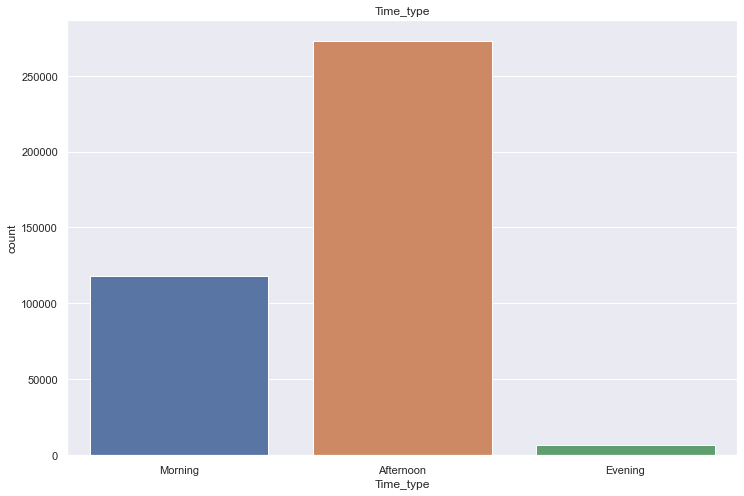

In [78]:
plt.figure(figsize=(12,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)

## Findings__
**As we can clearly see now that we have Afternoon time where we have maximum customer purchasing items/gifts.**


* Most of the customers have purches the items in Aftrnoon.
* Moderate numbers of customers have purches the items in Morning .
* Least numbers of customers have purches the items in Evening.

In [79]:
df.head(5) # let;s see the dataset and limiting the rows to 5

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday  2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   

   month_num  day_num  hour  minute  TotalAmount     Month Time_type  
0         12        1     8      26        15.30  December   Morning  
1         12        1     8      26        20.34  December   Morning  
2         12        1     8      26        22.00  December   Morning  
3         12        1     8      26        20.34  December   Morning  
4         12        1     8      26        20.34  December   Morning

### Let's create <font size = +3 color ="Blue"><b> RFM model (Recency, Frequency,Monetary value)</b><font/>

* Recency, frequency, monetary

**Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on**

* Performing RFM Segmentation and RFM Analysis.

**The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M)**

* Calculating RFM scores.

**The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, the higher the RFM score, the more valuable the customer.**

In [84]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase

Latest_Date = dt.datetime(2011,12,10) # SETTING LATEST DATE AS 2011-12-10

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

* In above code I just calculated the RFM  where recency was calculated using reference of the latest date which would say__One day after the last invoice date named as latest_date and also extracting the difference of dates into days.



# *Few findings____*

  * **Customer at "0" row was not recent for its purchase also he is not frequent user but his spendings are in bulk.**
  * **Customer "1" is too recent  and is most frequent among other 4 users and his spendings are also almost good.**
  * **Customer "2" was last active in 75 days ago and he is not that freqent user also he have spending of rs 1797/-**
  * **Customer "3" is the 18 days ago recent and he is frequent user after "1" customer and has spending of 1757.55/-**
  * **Customer "4" was active before 310 days ago and not that frequent user also not spending much.**
  
  
  
 # *Advices_to_business*
  
  * **we can't do anything much about "4" as he is not frequent and not recent also his spending is very less**
  * **"0" seems like bulk user so we will not touch him as well.**
  * **As 2nd look's like valuable user and who is very frequenty and spending also is more, which is good sign and should keep the services going ozn same way for him.**
  * **Talking about "2" and no. "3" user we can come us with few plans for these user so that we they don't churn. or so that we can enhance their purchases and shift towards valuable customers INSTEAD THEY MIGHT END UP BEING LEAST VALUABLE OVER TIME.**

* **Lower the number of recency tells that best the customer is for you in term of visiting website for purchage.**
* **shortly recency = How recent a person is for purchase.**
* **Frequecy = How frequent he/she does the purchase.**
* **Monitary= How much Money he/she spends.**
*  **Here in this case "3" in case of recancy means most recent so, higher the values of RFM means more valuable customer might be.**
* **In above lines I have calculated the recency and frequency and monitary for each customers.**


# ********************______________****************


* **Recency values has extracted using latest date- last invoice date.**
    * **No. of invoices considered for the frequency.**
    * **sum() of Total amount used for Monitary value.**


# **Recency Descriptive stat.**

In [85]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

## Findings__
* **from the discriptive statistics of the recency we can conclude that we have on an average of 50 days of gap for the purchase**


* **2nd observation that it is confering is that we have mean around 92 days but we do have the median 50 days, so that means bascally we do have skewed distribution of data in the recency column.**
* **Distribution in Recency is right skewed.**


<AxesSubplot:xlabel='Recency', ylabel='Density'>

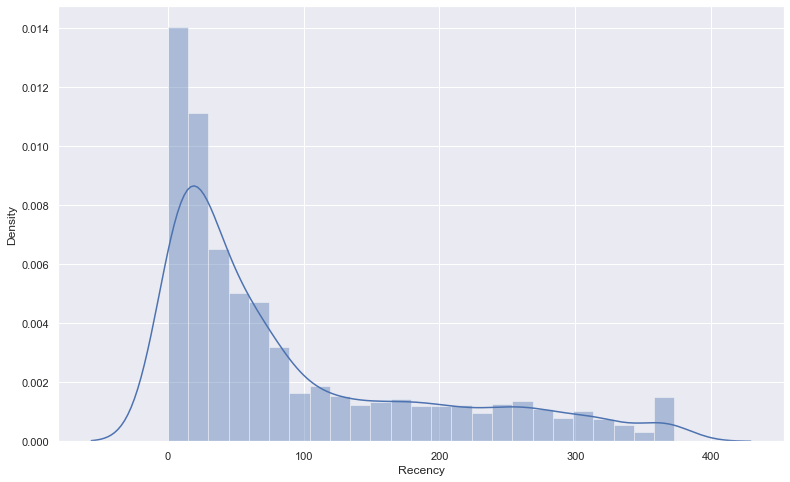

In [86]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

## Findings__
* **Distribution in Recency is right skewed.**
* **mean is greater than median.**
* **positively skewed or right tailed skewness.**

# ** Let's do same for Frequency**

In [92]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

## Findings__
* **Distribution in frequency is right skewed.**
* **mean is greater than median.**
* **positively skewed or right tailed skewness.**
* **we have only few customer /or odd numbers who has purchase ferequency of 7847/-**
* **We have on an average 41 times people purchased.**

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

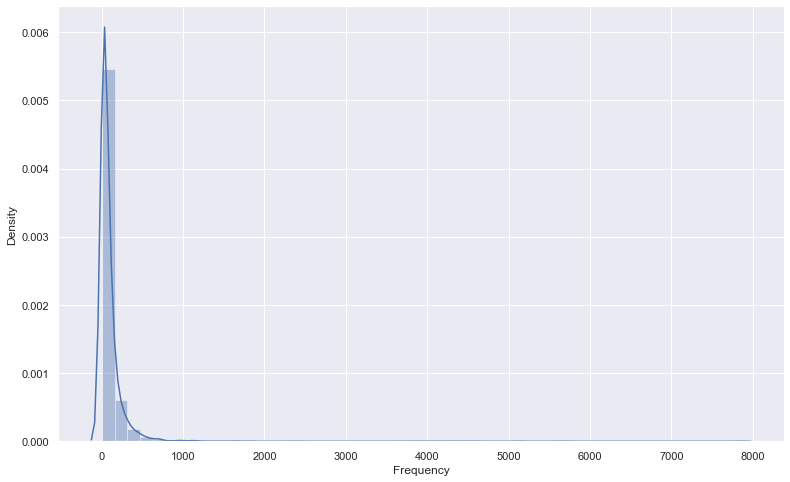

In [88]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

## Findings__
* **Distribution in frequency is right skewed.**
* **mean is greater than median.**
* **positively skewed or right tailed skewness.**

# **Monitary descriptive statistics**

In [93]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

## Findings__
* **we have again data skewed and also we have maximum amount of 280206 which is great sign and average of people are spending around 674 rupees where 75% people we have 1661**

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

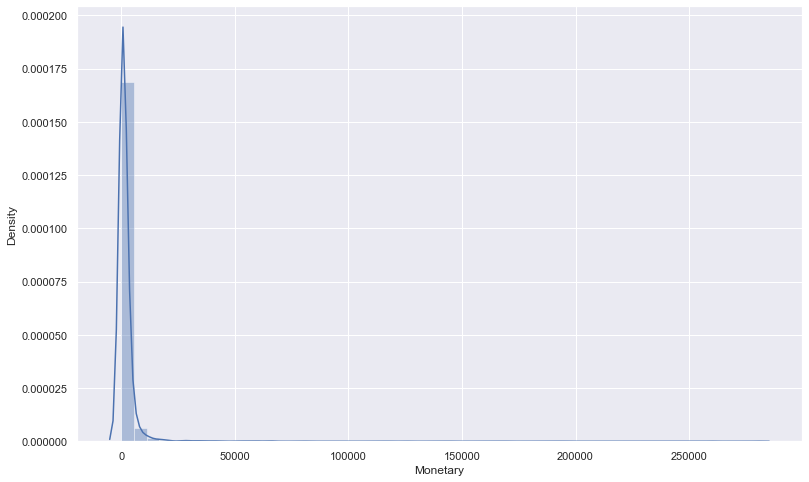

In [94]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

##  ***Now that we have explored the RFM values and built RFM dataframe with its- Recency frequency and Monitary scores, we can now go ahead and apply the segmentation on top of it.***

# Let's convert these into the <font size = +3 color ="Blue"><b>Quantile bucketing </b><font/>

## Spliting into 4 segment using quantile

In [96]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [97]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}

### **Here telling that if anything to range 0.25 make it as bucket 1, 0.5 make it bucket 2 and 0.75 make it bucket 3, anything above 0.75% make it bucket 4th**

* **at 25% for recency value is 17.0 and for 75% value is 141.5**
* **at 25% for frequency again 17.0 and for 75% 100**
* **at 25% for monetary we have 307 and for 75% we have 1661.61**

## After bucketing now let's do <font size = +4 color ="Blue"><b>Scoring</b><font/>  like 1,2,3,4 based on RFM values

In [101]:
#Functions to create R, F and M segments
def RScoring(x,p,dict):
    if x <= dict[p][0.25]:
        return 1
    elif x <= dict[p][0.50]:
        return 2
    elif x <= dict[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,dict):
    if x <= dict[p][0.25]:
        return 4
    elif x <= dict[p][0.50]:
        return 3
    elif x <= dict[p][0.75]: 
        return 2
    else:
        return 1

#### **Here in this function we have said that based on RFM score assign the values of 1,2,3,4 where 111 conbination will tell the best customer and 333 will say that worst customer.**
* **Generally we do have higher the score means more valuable customer is and lesser the score means we have worst customer.**
* **How we score it does not impact alot but cutting the scores at perticular threshhold matters.**


In [102]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

## Findings__
**So now from this above chart and we can conclude the higher the score in term of RFM perspective we have worst customer but, lower the score of R,F,M we have best customer for us since we have defined in opposite fashion our scoring**
* **Score are ranging from 3-12**
* **3 =111**____Best set of customers.

* **12 =444**____Worst set of customers.

## Let's perform the groupby on these scores

In [103]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

* **Got the groupby of the scores like 111,444 and got the sum of that value for eg 441=9RFMScore**

In [105]:
rfm_df.RFMScore.describe() # le's see descriptive stat of range of score

count    4339.000000
mean        7.503111
std         2.814485
min         3.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: RFMScore, dtype: float64

**we have mean of score 7.5 and median of score 9 minimum of 3 and maximum of 12**

In [106]:
rfm_df.Recency.describe() # le's see descriptive stat of recency and find out if 00

count    4339.000000
mean       92.049551
std       100.000372
min         1.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

In [108]:
rfm_df.Frequency.describe() # le's see descriptive stat of frequency and find out if 00

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

In [109]:
rfm_df.Monetary.describe() # le's see descriptive stat of  and find out if 00

count      4339.000000
mean       2053.793248
std        8988.248329
min           1.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

### Now why we have to look into these because if we would have applied Log transformation so log of 1 is 0 so the values which are minimum of 1 would have shown as 0. Since we have not applied log transformation so values are still in 1 instead 1 replaced after log transformation will be to 0 so to explore these values discriptive stat. is important to see.

# cuting the scores at certain THRESHHOLD

In [110]:
rfm_df[rfm_df.RFMScore<=5].shape # cutting with 5 and less

(1263, 8)

#### So we have 1263 customer which are really really good for my business

In [111]:
rfm_df[rfm_df.RFMScore<=8].shape # cutting with 8 and less

(2587, 8)

In [112]:
rfm_df.RFMScore.value_counts() # le's see descriptive stat of frequency and find out if 00

10    517
9     465
7     459
8     452
3     440
5     428
6     413
4     395
11    386
12    384
Name: RFMScore, dtype: int64

#### We have 11,12 lost customers and we have 3,4,5,6 probably good ones, and we have modelrately good 6,7,8,9,10 customers

#### We have score upto and below 8 which are moderately good customer.

### HERE WE CAN USE LOGARITHMIC TRANSFORMATION AS WELL IF WE WANT OUR DATA NEAR OR CLOSE TO NORMAL DISTIBUTION

###  **Till now we have seen that we have used RFM model for our dataset and now let's just try using MACHINE  LEARNING MODEL INCLUDING k-MEAN CLUSTERING AND HIERARCHICAL CLUSTERING AND LET'S SEE THEM USING ELBOW AND SILHOUTTE METHOD**

 # LET'S TRY <font size = +4 color ="RED"><b>k-MEAN-CLUSTERING</b><font/>

In [117]:
from sklearn import preprocessing # IMPORTING LIBRARIES AND MODELS REQUIRED
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log) # creating 3 columns and applying function math.log on those.
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

from sklearn.metrics import silhouette_score 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler() # scaling the dataset before even fiting the data
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
sill_score_list= []
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15] # Number of clusters
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    sill_score_list.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42104336176043494
For n_clusters = 3, silhouette score is 0.3430608184527577
For n_clusters = 4, silhouette score is 0.36418440705764
For n_clusters = 5, silhouette score is 0.3345730545688567
For n_clusters = 6, silhouette score is 0.3441549175819245
For n_clusters = 7, silhouette score is 0.3476379344218347
For n_clusters = 8, silhouette score is 0.3386265042587762
For n_clusters = 9, silhouette score is 0.34547769117224497
For n_clusters = 10, silhouette score is 0.34835302562354437
For n_clusters = 11, silhouette score is 0.3370284674098715
For n_clusters = 12, silhouette score is 0.3419281871126301
For n_clusters = 13, silhouette score is 0.3392460509075407
For n_clusters = 14, silhouette score is 0.33377681044969393
For n_clusters = 15, silhouette score is 0.3387420875926677


### **IN ABOVE WE ARE APPLYING K-MEANS ON THE TRANSFORMED DATA(STANDERDIZATION) THAT WE HAVE, AND WE ARE BUILING 2-15 NUMBERS OF CLUSTERS AND FITTING THE CLUSTERS AND CALCULATING THE SILHOUETTE SCORES
* **Have taken only recency and monetary values**

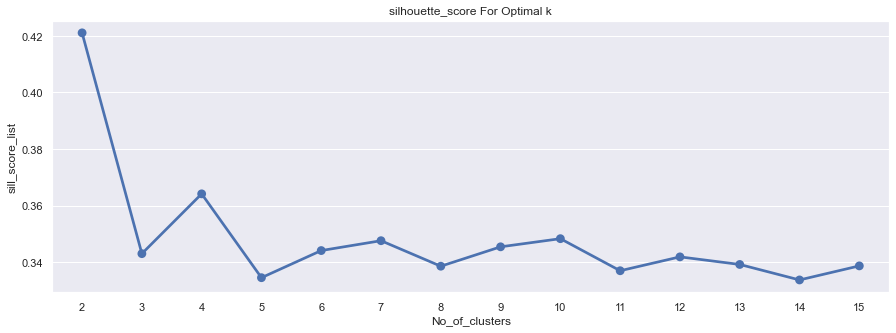

In [118]:
#Plot the graph for the ssilhouette score
plt.figure(figsize=(15,5))
sns.pointplot(x = range_n_clusters, y = sill_score_list)
plt.xlabel('No_of_clusters')
plt.ylabel('sill_score_list')
plt.title('silhouette_score For Optimal k')
plt.show()

## Findings__
* **From this graph we can conclude that score if we have 1 is good and if we have -1 tells bad**
* **So from the graph optimal of clusters should be "4" we 2 also makes sense but less data in case of 2.**
* **More the sill. score better the clusters.**
* **silhouette_score tries to tell us that similarity within cluster is more and dissimilarity among cluster is also more.**
* **(-1-0-+1) where +1 shows that above mentioned idea scenario and higher the silhouette_score value better the cluster.**

# **Calculation of Silhouette score**



### Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* ### Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* ### Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

### The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

# **Applying Elbow Method on Recency ,Frequency and Monetary**

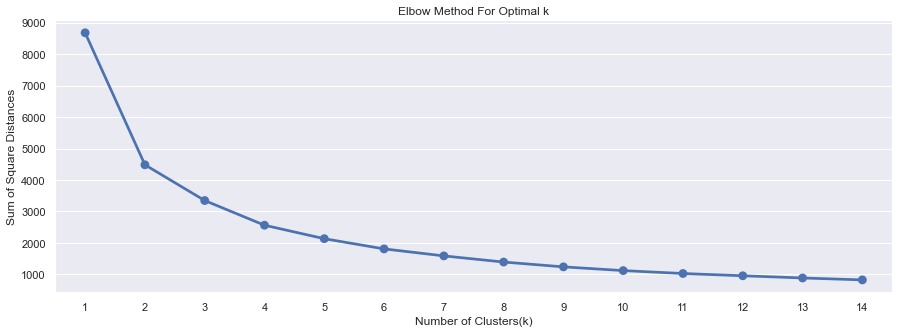

In [122]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize =(15,5))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [124]:
from sklearn.cluster import KMeans # importing the model and setting k=2 and predicting the scores
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

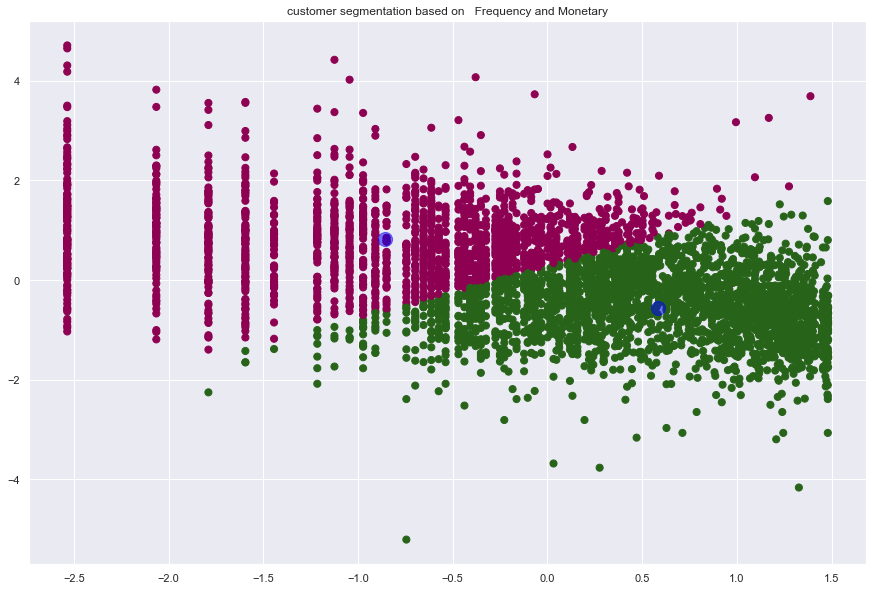

In [134]:
plt.figure(figsize=(15,10)) # plotting the above actions
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

* **Above plot is not giving that significant difference while we observe the clusters.**
* **We don't think so that this is significantly much evident or we can observe better.**

### Let's try another Technique DBSCAN ON Recency and Monetary.

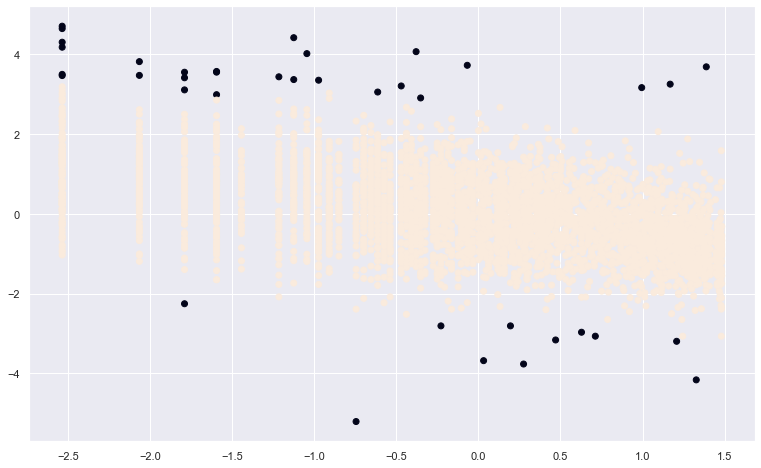

In [135]:
from sklearn.cluster import DBSCAN # importing DBSCAN AND MATRICS AND FITING THE MODEL
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

* **DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.**




* **DBSCAN -The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. eps=0.5,this is the most important DBSCAN parameter to choose appropriately for your data set and distance function.**



* **The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors**

* **Based on distance it devive the data into core, outlier or middle or normal range.**

### Findings___

* **Clustering done by DBSCAN look much better than the k-mean-clustering as it divide the datapoints into 3 segment core, outlier and middle range**
* **Seperation of cluster is evident from DBSCAN visually and better  than the K-mean-clustering.**
* **We can conclude that customers are well seperated using DBSCAN.**

# **Applying silhouette_Score to Method on Frquency and Monetary**

## Till here we have use recency and monetary, let's now use frequency and monetary

In [137]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4782608772260966
For n_clusters = 3, silhouette score is 0.40744938896163335
For n_clusters = 4, silhouette score is 0.3713522350347286
For n_clusters = 5, silhouette score is 0.3446733163127828
For n_clusters = 6, silhouette score is 0.3620855018818591
For n_clusters = 7, silhouette score is 0.34382423095061854
For n_clusters = 8, silhouette score is 0.34950457898424625
For n_clusters = 9, silhouette score is 0.346655109353912
For n_clusters = 10, silhouette score is 0.3593037626513285
For n_clusters = 11, silhouette score is 0.36955517399744764
For n_clusters = 12, silhouette score is 0.3525136701916756
For n_clusters = 13, silhouette score is 0.3619535907093025
For n_clusters = 14, silhouette score is 0.35385815353069805
For n_clusters = 15, silhouette score is 0.3522916025065814


# **Applying Elbow_method on Frquency and Monetary**

Text(0.5, 1.0, 'Elbow Method For Optimal k')

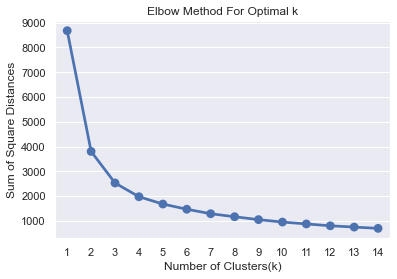

In [141]:
from sklearn.cluster import KMeans # imprting k means and and creating instance of dict() and saving the score iteration in that

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')

## Look's lie we can consider 4,5,6 as the best cluster as SSE started gradualy decreasing and diffrence almost is constant after these point.

In [146]:
from sklearn.cluster import KMeans # importing model ansd setting the k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

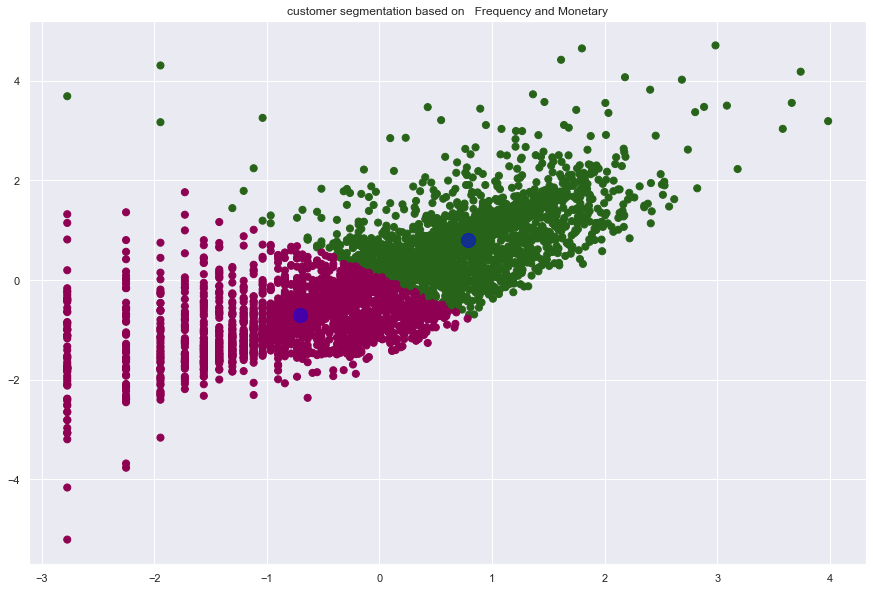

In [147]:
plt.figure(figsize=(15,10)) # plotting the above action
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

#### cluster seperation are not that great

# **Let's try DBSCAN ON FREQUENCY AND MONETARY

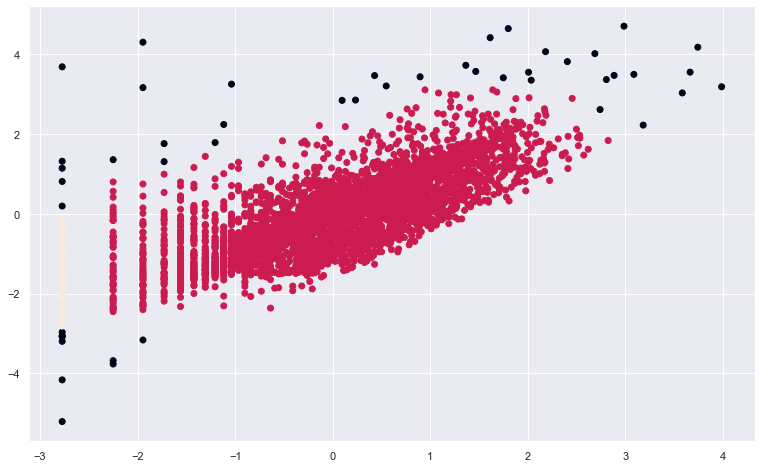

In [148]:
from sklearn.cluster import DBSCAN # IMPORTING DBSCAN AND MATRICS REQUIRED
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

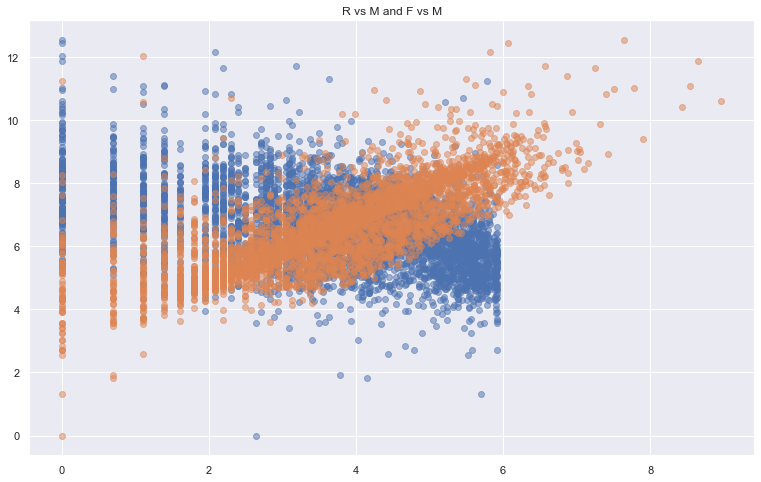

In [149]:
plt.figure(figsize=(13,8)) # COMPARING TWO RECENCY MONETARY AND FREQUENCY AND MONETARY WHICH COULD BE THE BETTER
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

#### WE SEE THAT WHEN WE HAVE FREQUENCY AND MONETARY ITS BETTER THAN THE RECENCY AND MONITARY

# **3D visualization of ALL SCORES TOGATHER Recency ,Frequency and Monetary**

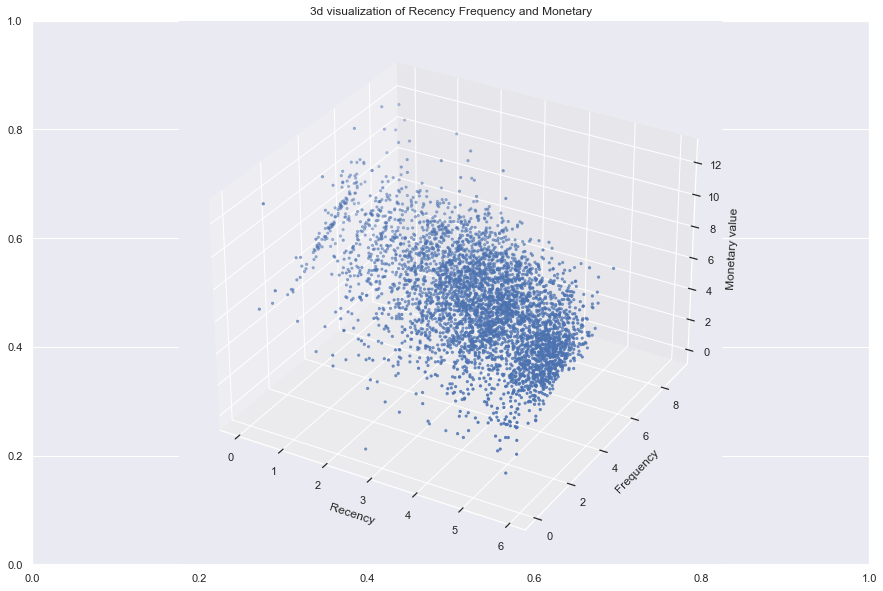

In [150]:
from mpl_toolkits.mplot3d import Axes3D # IMPRTING 3D PLOT
fig=plt.figure(figsize=(15,10))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency_log
ys=rfm_df.Frequency_log
zs=rfm_df.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

# **Applying silhouette_Score to Method on ALL TOGATHER  Recency,Frquency and Monetary**

In [151]:
feature_vector=['Recency_log','Frequency_log','Monetary_log'] # CONDERING ALL THE FEATURED AND APPLIYING STDIZATION.
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.3951770707909246
For n_clusters = 3 The average silhouette_score is : 0.30281683869037207
For n_clusters = 4 The average silhouette_score is : 0.3017123663809571
For n_clusters = 5 The average silhouette_score is : 0.2785661461874347
For n_clusters = 6 The average silhouette_score is : 0.27885758546690703
For n_clusters = 7 The average silhouette_score is : 0.26198642962742774
For n_clusters = 8 The average silhouette_score is : 0.26471675852789284
For n_clusters = 9 The average silhouette_score is : 0.2530153778663923
For n_clusters = 10 The average silhouette_score is : 0.2530579934556927
For n_clusters = 11 The average silhouette_score is : 0.25926997752720254
For n_clusters = 12 The average silhouette_score is : 0.26592784520282725
For n_clusters = 13 The average silhouette_score is : 0.2621284616521827
For n_clusters = 14 The average silhouette_score is : 0.2609563057895865
For n_clusters = 15 The average silhouette_score is :

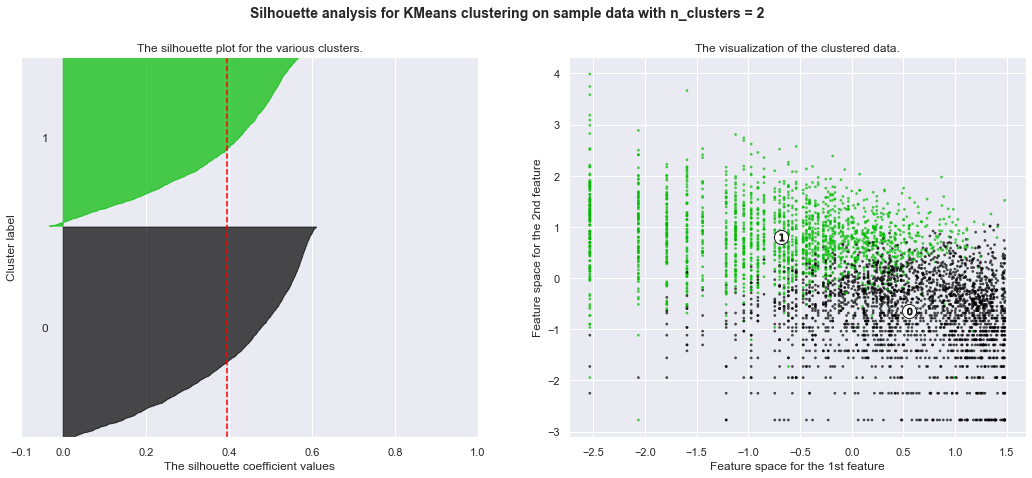

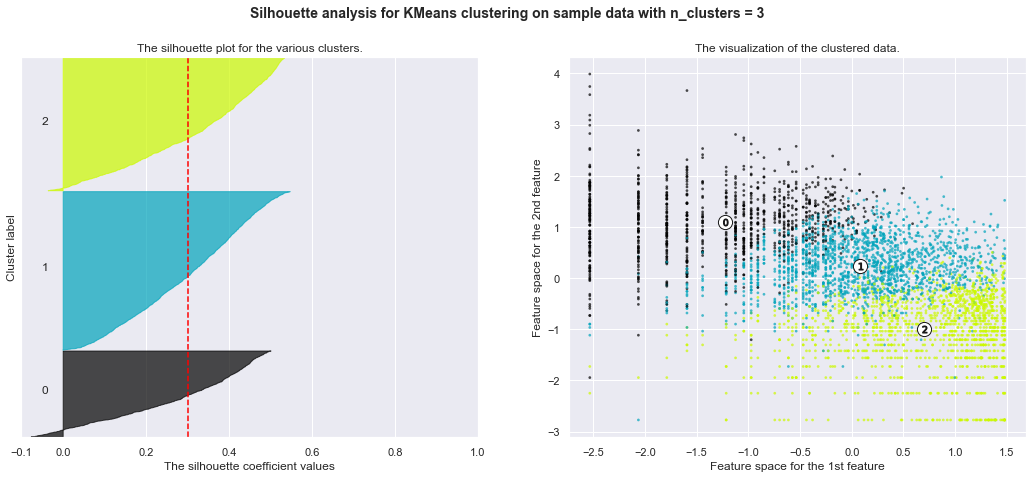

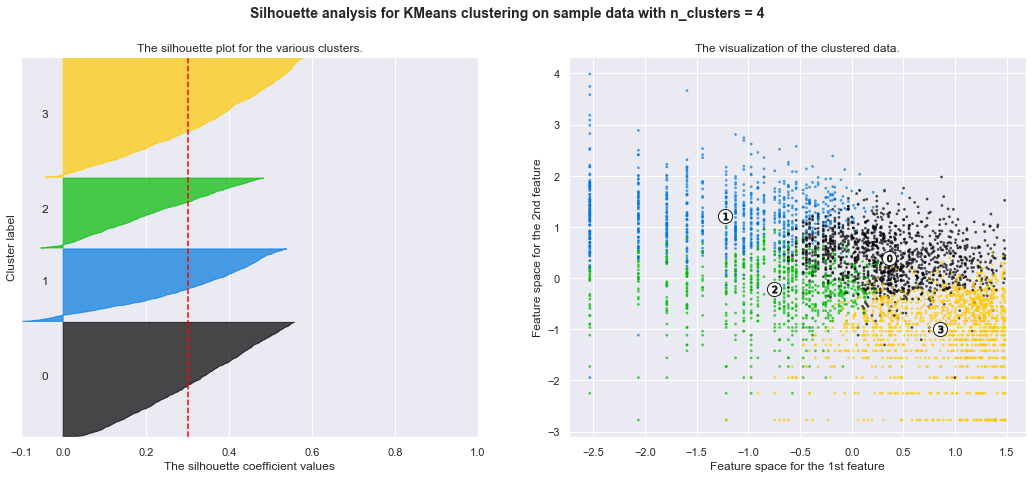

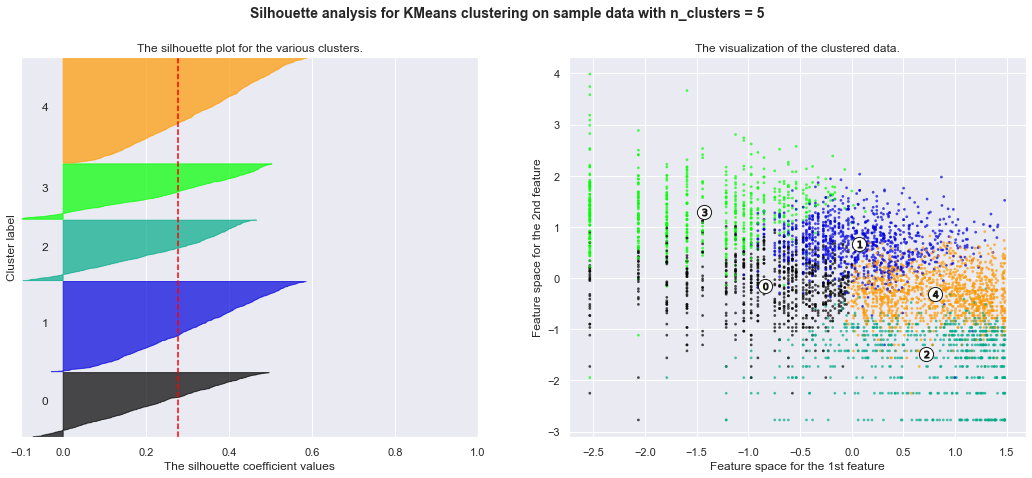

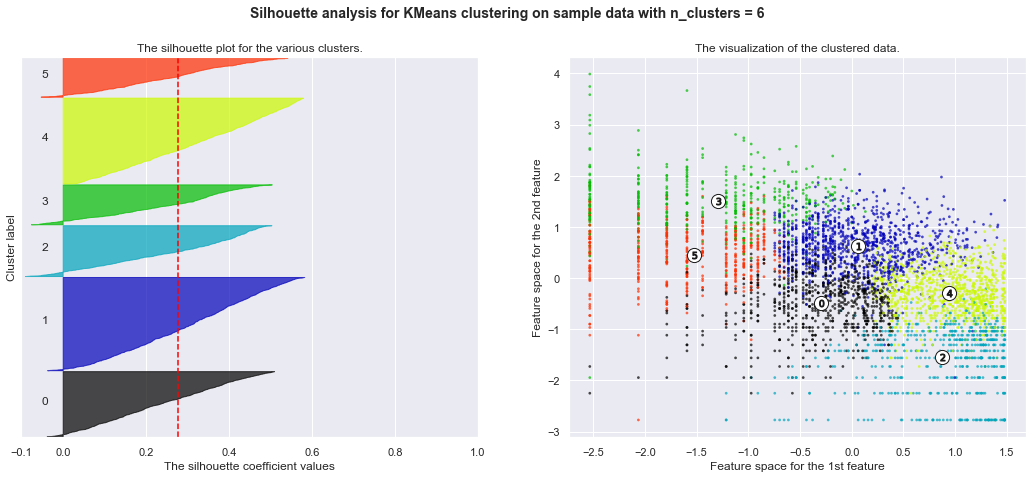

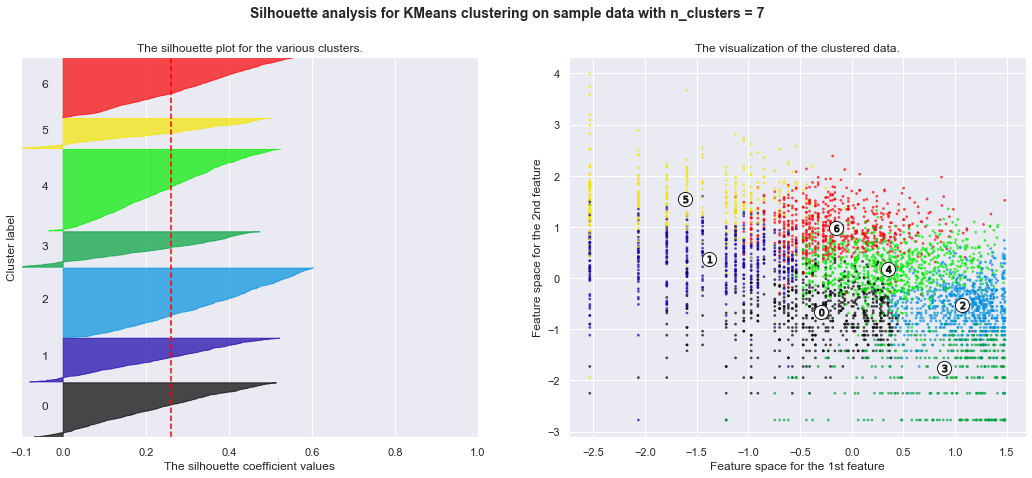

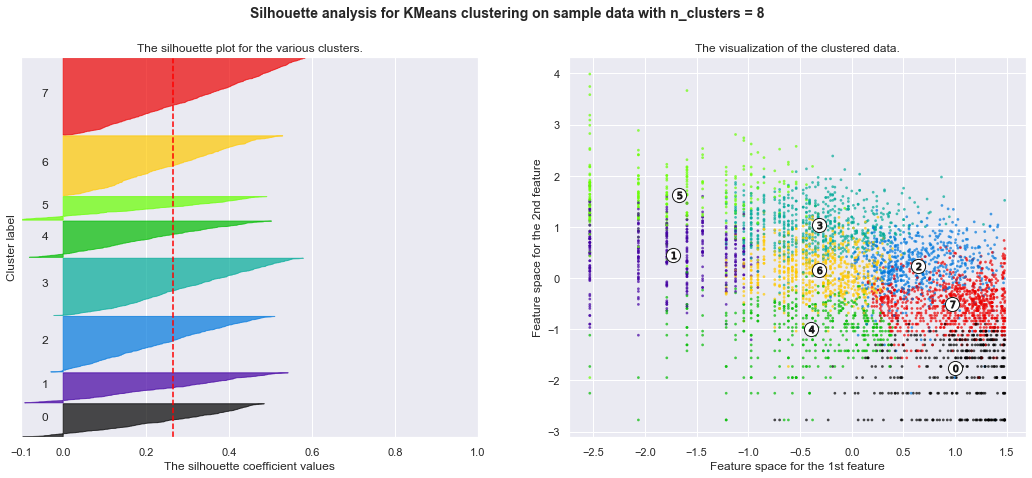

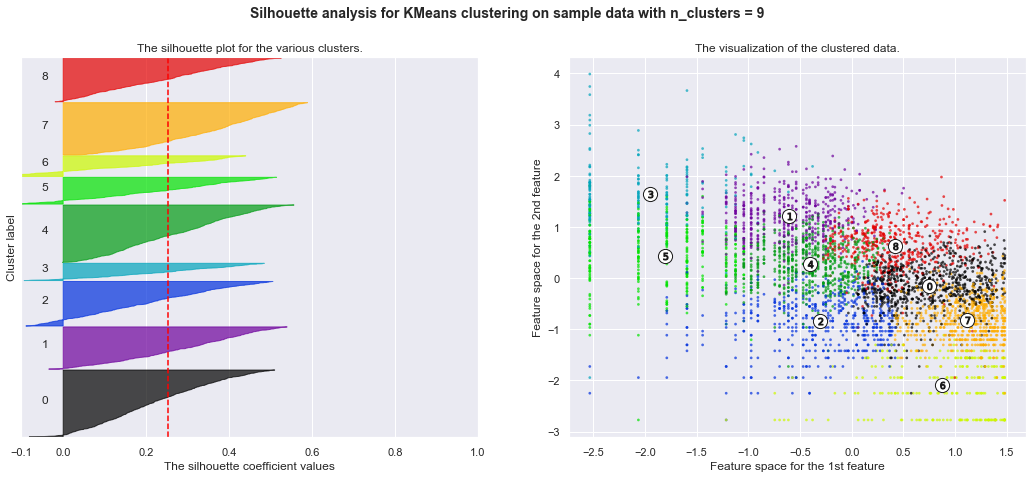

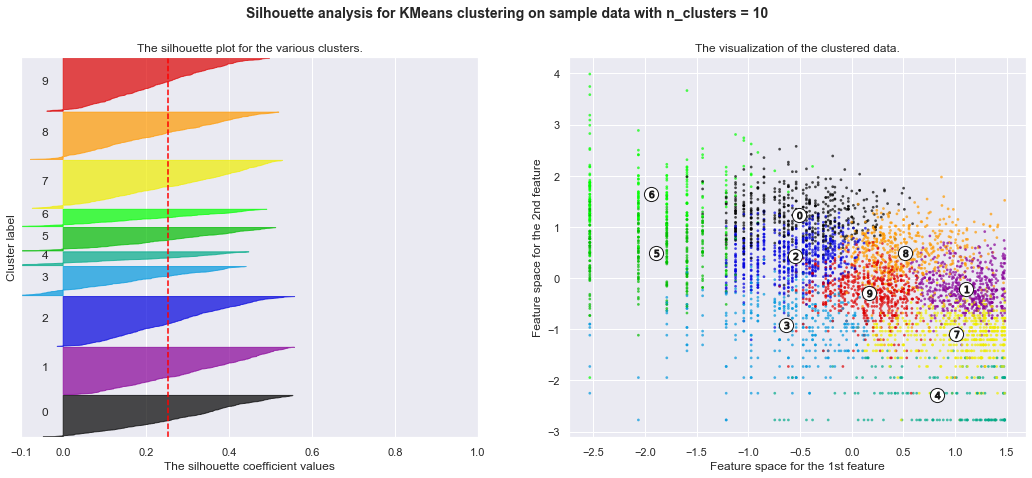

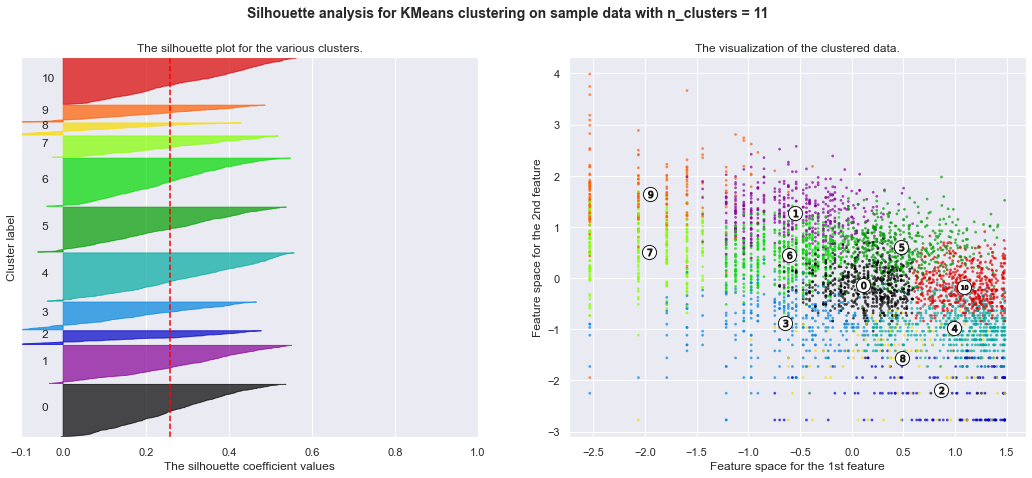

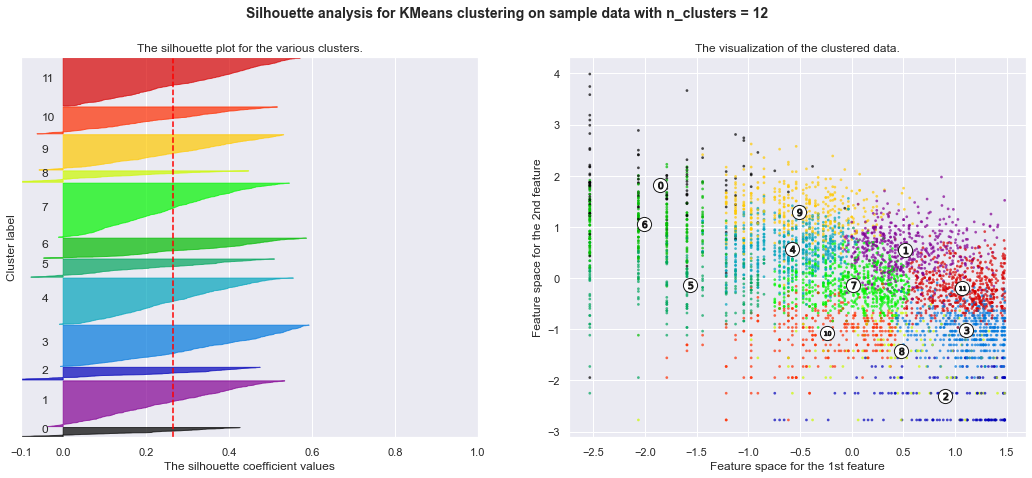

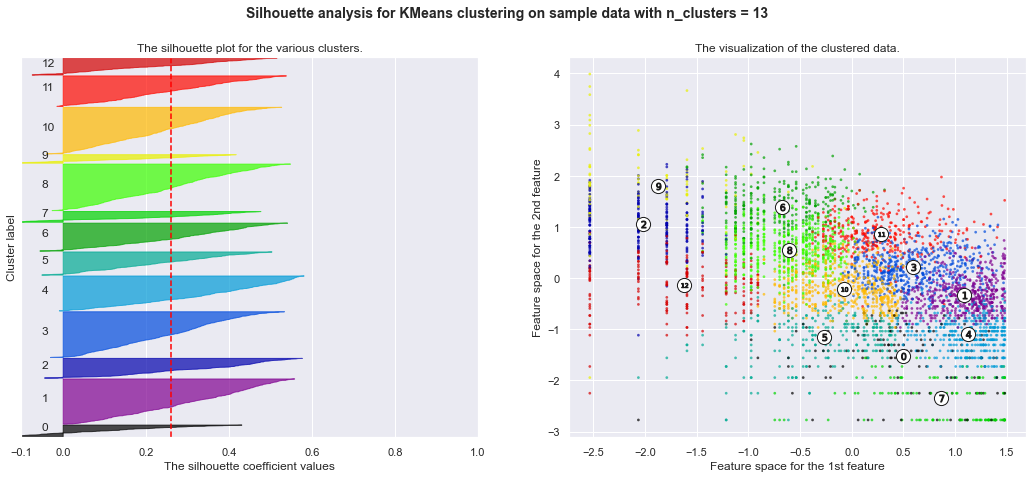

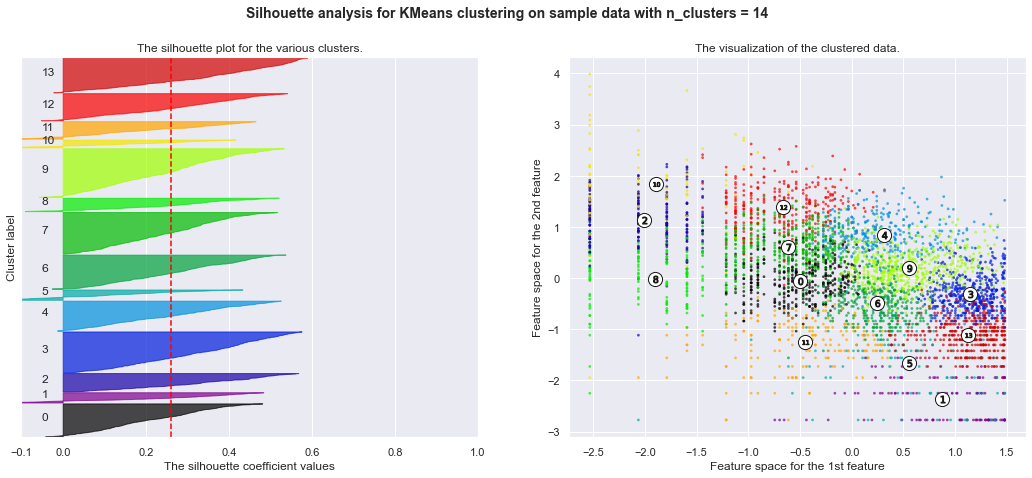

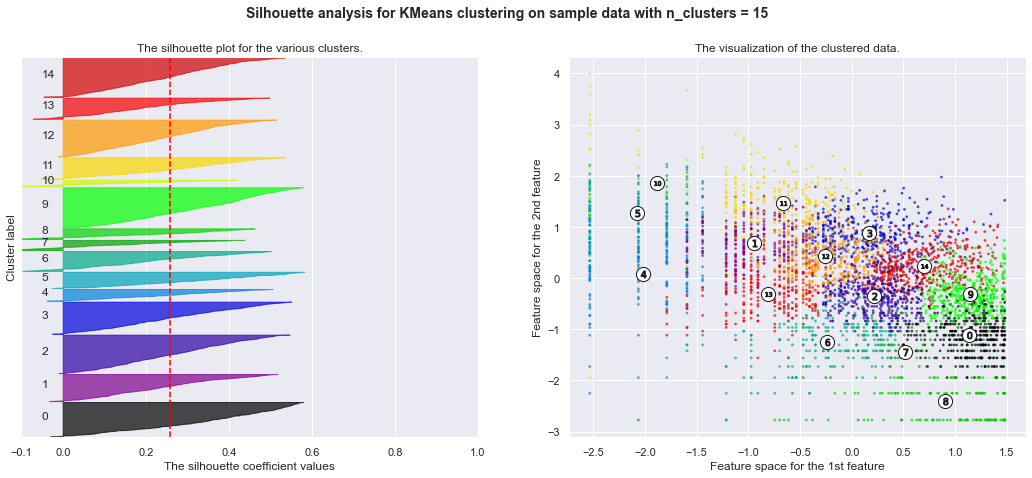

In [152]:
from sklearn.metrics import silhouette_score # APPLYING K MEANS AND GETTING  SILL_SCORE FOR EACH SAMPLES
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

* **In above code I am applying K -means and getting the silhouete scores for the cluster ranging 2-15, and getting the average scores even for the samples**

In [153]:
from sklearn.cluster import KMeans # performing k_mean on X with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

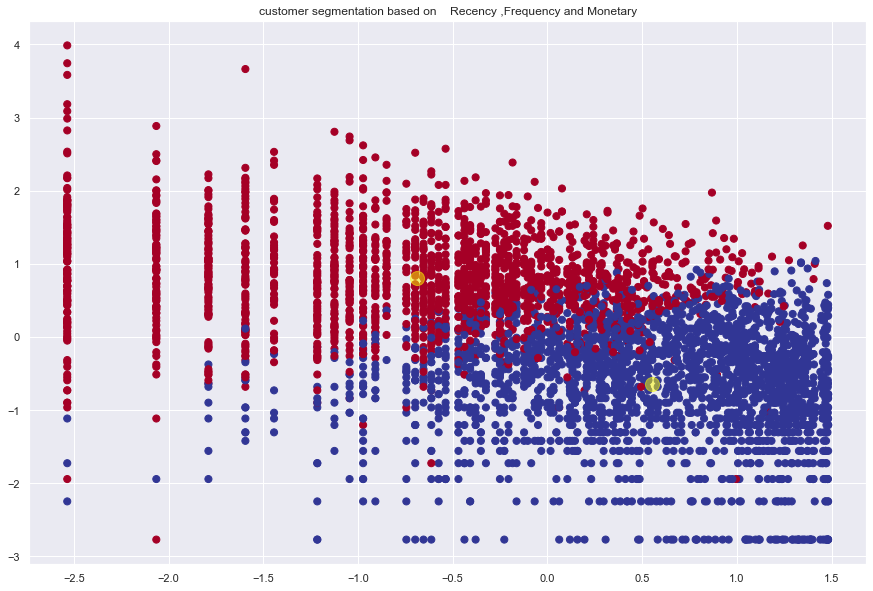

In [154]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

### Customer are well seperated when we have all the feature recency monetary and frequency

# **Applying Elbow Method on ALL TOGATHER Recency ,Frequency and Monetary**


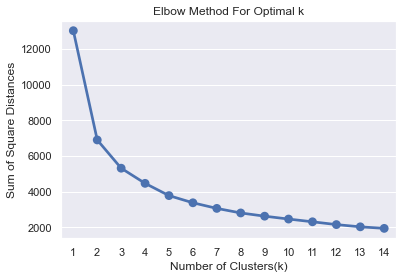

In [155]:
from sklearn.cluster import KMeans # SAME APPROACH AS 1-15 CLUSTERS IMPORTING

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### FLATTEING IS HAPPEING AT WAY DEEPER IN 11,12, SO WOULD WOULD PICK PROBABLY 5-6

In [156]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        0  
12347.0        0.693147       5.204007      8.368693        1  
12348.0        4.317488       3.433987      7.494007        0  
12349.0        2.890372       4.290459      7.471676        1  
12350.0        5.736572       2.833213      5.812338        0  
12352.0        3.583519       4.442651      7.826459        1  
12353.0        5.318120       1.386294      4.488636        0  
12354.0        5.446737       4.060443      6.984161        0  
12355.0        5.365976       2.564949      6.129921        0  
12356.0        3.091042       4.077537      7.941449        1

In [158]:
rfm_df.groupby('Cluster').mean() # now checking the centroid

Recency   Frequency     Monetary         R         F         M  \
Cluster                                                                      
0        140.820630   24.921707   470.070635  3.110605  3.271748  3.251450   
1         30.889351  175.461299  4039.822541  1.720519  1.552727  1.557922   

         RFMScore  Recency_log  Frequency_log  Monetary_log  
Cluster                                                      
0        9.633803     4.550260       2.830774      5.778694  
1        4.831169     2.716881       4.742908      7.605738

### Findings___
* **Above code is telling what is the centroid for these 0 and 1 clusters**
* **With this we can say that with first group of guys are having recency of 30 days and also are having frequency and moentary of 175, and 4039 n an average.**
* **3rd conclusion could be that we have group 1 which is actually important and we have group 0 which has monetary of 470 so we can look for improvement and come up with plans to retain these people**

## Just setting clusters=5

In [161]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        1  
12347.0        0.693147       5.204007      8.368693        3  
12348.0        4.317488       3.433987      7.494007        1  
12349.0        2.890372       4.290459      7.471676        1  
12350.0        5.736572       2.833213      5.812338        0  
12352.0        3.583519       4.442651      7.826459        1  
12353.0        5.318120       1.386294      4.488636        2  
12354.0        5.446737       4.060443      6.984161        0  
12355.0        5.365976       2.564949      6.129921        0  
12356.0        3.091042       4.077537      7.941449        1

In [162]:
rfm_df.groupby('Cluster').mean() # now checking the centroid

Recency   Frequency     Monetary         R         F         M  \
Cluster                                                                      
0        164.870173   30.952342   527.723584  3.446179  3.014790  3.006574   
1         60.560694  115.254335  2118.716051  2.428709  1.573218  1.593449   
2        168.643367    7.085592   198.099401  3.319544  3.977175  3.840228   
3          7.979299  325.815287  8678.093201  1.105096  1.162420  1.114650   
4         16.773510   41.115232   637.393154  1.437086  2.737748  2.838411   

          RFMScore  Recency_log  Frequency_log  Monetary_log  
Cluster                                                       
0         9.467543     4.913865       3.277944      6.089315  
1         5.595376     3.825363       4.578263      7.415378  
2        11.136947     4.795721       1.709793      5.010791  
3         3.382166     1.607258       5.404106      8.380663  
4         7.013245     2.506308       3.483111      6.234881

## Findings___
* **We have distinction among the clusters here in these above 5 clusters**
  * **We have cluster "0" recency of 164 days ago, and frequency of 30 days, and monetary of 527/-  on an average**
  * **We have clsuter "1" which is slight diffrent from clsuter "0" has recency less than first but frequent more, and spending more than cluster "0"**
  * **We now have cluster "2"cluster with most recency and frequency also less and monetary also less hence in diffrent cluster**
  * **We now have cluster "3" very recently purchased and very frequent and also ery much spending money on an average_(_basically topper)**
  * **We now have "4" cluster with 2nd most recency but less frequent and almost 637/- monetary.**
  
 ### These all clusters are distinct in nature in one or other term, let's say that few are good in recency but few are good in recency and bad in monetary and frequency. where few are totally worst and some are best in term of all the RFM values
  

# **Hierarchical clustering  to find the optimal number of clusters**

# Use of dendrogram for optimal clustering

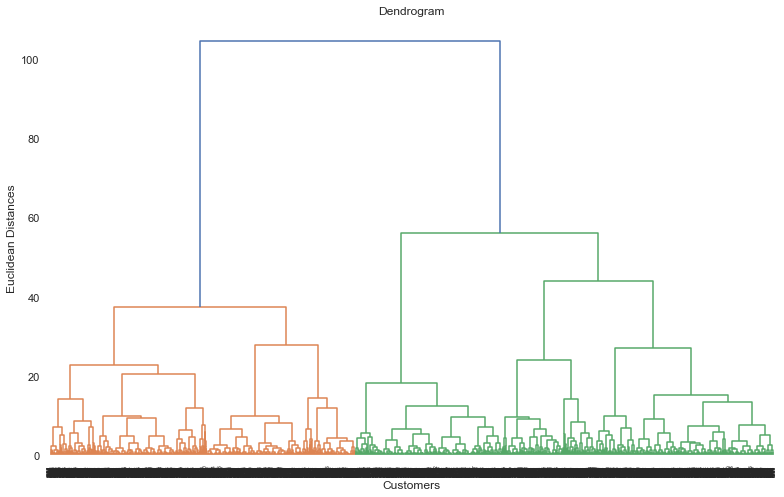

In [163]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

### **The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90**

### **No. of Cluster = 2**
* **we can choose the cluster and line to cut the cluster into as to how many clusters we want.**
* **In above case we can probably cut the cluster into 4-5 cluster by setting the threshhold value between 40-60 would be great amount of clusters**

In [167]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

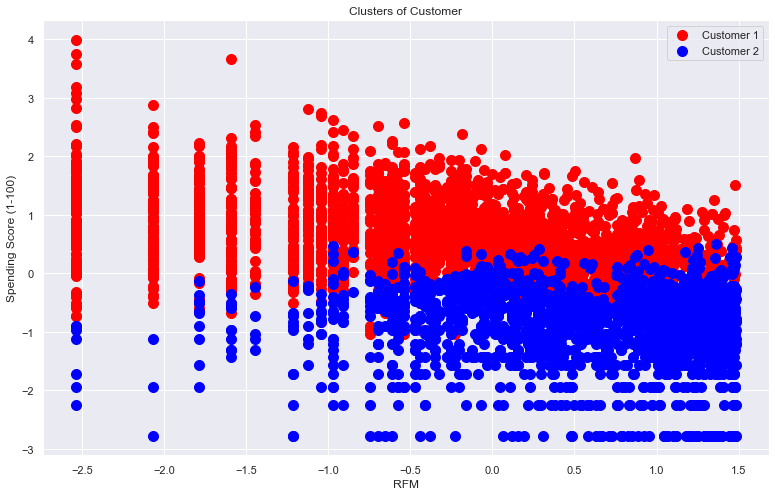

In [168]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### By applying different clustering we get the optimal number of cluster is equal to 2

# **Applying DBSCAN to Recency ,Frequency and Monetary**

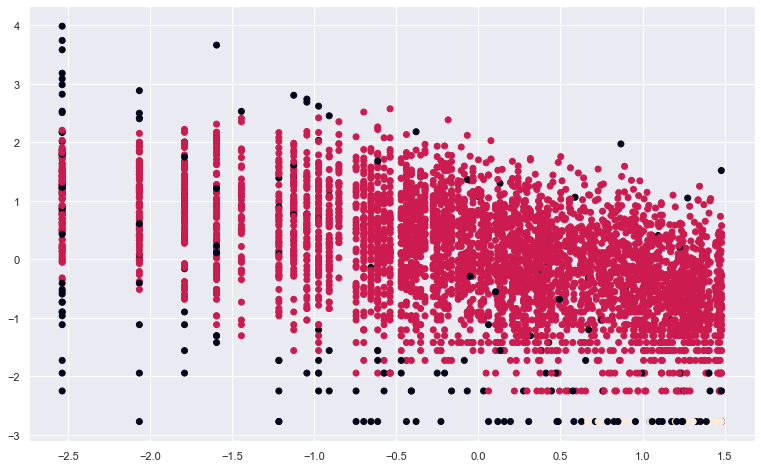

In [169]:
from sklearn.cluster import DBSCAN # now applying BSCAN on all togather on all 3 features
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

### we get to know from this graph that customers are well seperated when we do use all 3 features monetary and frequency and recency togather

# Summary of scores

In [172]:
pip install prettytable # installing prettytable

### PrettyTable is a Python library that is used to represent tabular data in visually appealing ASCII tables. It is quick and easy to use.

In [173]:
from prettytable import PrettyTable # using pretty table summertizing the scores
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  

### This is summerizes the optimal clusters when we use different different features with the combination of 2 features and combinations of the 3 features.







* **RM(recency, monetary) = 2 optimal features**
* **FM(frequency, monetary)= 2optimal features**
* **Using K means with silhouette_score and with elbowand with DBSCAN**
* **RFM(recency,frequency,monetary) USING dbscan = 3 clusters are optimal.**
* **RFM using hierarchical, k-mean, silhouette_score and Elbow method gives 2 as optimal clusters.**